# Project 1 Data Analysis & Visulization

**Purpose:** Analyze TikTok data by putting it into DataFrames and creating visualizations.

**Outline**  
- [Making DFs](#clean)
  - [Reading files from Github](#read-file)   
  - [Creating DataFrames](#make-df)   
  - [Testing success of collection](#test)   
- [Data Analysis](#analysis)   
  - [Likes by bot over time](#likes)
  - [Jaccard index](#jacc)
  - [Hashtag frequency](#hashfreq)
  - [Music frequency](#musfreq)
  - [Author frequency](#authfreq)   
  - [Video interactions over time](#interactions)

**Authors:** Lillie Godinez, Amy Hu, Brooke Bao, Sooahn Lee, Adelle Wang, Rachel Xu



Import libraries and packages need for our analysis

In [1]:
#Import Libraries Here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import urllib
import requests

# <a name="clean"> Making DataFrames </a>
## <a name="read-file"> Reading from GitHub </a>

Function to read all files into a list given the information needed to recreate the path of the repo

In [2]:
def list_files_in_repo(owner, repo, path='', branch='master'):
    api_url = f"https://api.github.com/repos/{owner}/{repo}/contents/{path}?ref={branch}"
    response = requests.get(api_url)
    response.raise_for_status()  # Raise an exception for any errors

    contents = response.json()
    files = []
    for item in contents:
        if 'type' in item and item['type'] == 'file':
            files.append(item['name'])
        elif 'type' in item and item['type'] == 'dir':
            files.extend(list_files_in_repo(owner, repo, item['path'], branch))

    return files

# Example usage:
owner = 'lillgodi'  # Replace with the GitHub username or organization
repo = 'CS315-project1-group3'  # Replace with the repository name
branch = 'main'  # Replace with the branch name if needed
path = 'data'  # Optional: path within the repository, leave empty for the root directory
files = list_files_in_repo(owner, repo, path, branch)
#print(files)

Function to loop through the list of all files in the repo, then access the raw data using the raw.githubusercontent.com link for a specific person at a specific condition given the file type of interest (ex: all videos or only liked videos).

In [3]:
people = ['AH','LG','AW','RX','BB','SL']
rawpath = 'https://raw.githubusercontent.com/lillgodi/CS315-project1-group3/main/data/'

def makeAllDF(person,condition,files,rawpath,filetype):
  df = pd.DataFrame()

  for f in files:
    if person in f and condition in f and filetype in f:
      this = pd.read_csv(rawpath+f)
      df = pd.concat([df, this])

      #print(f)

  return df

## <a name="make-df"> Making relevant DataFrames </a>

For each person, three data frames are made:


*   All videos collected during control condition (xxx_control)
*   All videos collected during active condition (xxx_active)
*   Only liked videos collected during active condition (xxx_likes)



In [4]:
amy_control = makeAllDF('AH','Cntrl',files,rawpath,'all_videos')
amy_active = makeAllDF('AH','Activ',files,rawpath,'all_videos')

lillie_control = makeAllDF('LG','Cntrl',files,rawpath,'all_videos')
lillie_active = makeAllDF('LG','Activ',files,rawpath,'all_videos')

brooke_control = makeAllDF('BB','Cntrl',files,rawpath,'all_videos')
brooke_active = makeAllDF('BB','Activ',files,rawpath,'all_videos')

rachel_control = makeAllDF('RX','Cntrl',files,rawpath,'all_videos')
rachel_active = makeAllDF('RX','Activ',files,rawpath,'all_videos')

adelle_control = makeAllDF('AW','Cntrl',files,rawpath,'all_videos')
adelle_active = makeAllDF('AW','Activ',files,rawpath,'all_videos')

soo_control = makeAllDF('SL','Cntrl',files,rawpath,'all_videos')
soo_active = makeAllDF('SL','Activ',files,rawpath,'all_videos')

In [5]:
ah_likes = makeAllDF('AH','Activ',files,rawpath,'liked_videos')
lg_likes = makeAllDF('LG','Activ',files,rawpath,'liked_videos')
aw_likes = makeAllDF('AW','Activ',files,rawpath,'liked_videos')
rx_likes = makeAllDF('RX','Activ',files,rawpath,'liked_videos')
sl_likes = makeAllDF('SL','Activ',files,rawpath,'liked_videos')
bb_likes = makeAllDF('BB','Activ',files,rawpath,'liked_videos')

## <a name="test"> Testing the success of data collection </a>

Printing the total number of files per condition per person

In [6]:
#count num files
def count(person,condition,files,rawpath,filetype):
  df = pd.DataFrame()
  l = []
  for f in files:
    if person in f and condition in f and filetype in f:
      l.append(f)
  return len(l)

for i in ['Cntrl','Activ']:
  for p in people:
    print(p,i,count(p,i,files,rawpath,'all_videos'))

AH Cntrl 25
LG Cntrl 25
AW Cntrl 25
RX Cntrl 25
BB Cntrl 25
SL Cntrl 25
AH Activ 25
LG Activ 25
AW Activ 25
RX Activ 25
BB Activ 25
SL Activ 25


Is the number of files relatively similar for each dataframe?

In [7]:
l = [amy_control, amy_active, lillie_control, lillie_active, brooke_control, brooke_active, rachel_control, rachel_active, adelle_control, adelle_active,soo_control,soo_active]
for i in l:
  print(len(i))

2434
2436
2165
2490
2307
2204
2492
2761
2203
2546
2744
1988


# <a name="analysis"> Data Analysis </a>

## <a name="likes"> Likes accumulated by bot over time </a>

Visualizing the total number of likes (across all personas) for each run as a bar graph. Then, adding together the number of liked posts in the active condition cumulatively for all runs visualized as a line plot. Completed by Lillie.

In [8]:
# make a DataFrame of liked videos for each active run hold the number of likes per run.
def calculateLikes(person,files,rawpath):
  likesList = []
  for f in files:
    if person in f and "Activ" in f and 'liked_videos' in f:
      df = pd.read_csv(rawpath+f)
      likesList.append(len(df))

  return likesList

In [9]:
ah_likes_list = calculateLikes('AH',files,rawpath)
lg_likes_list = calculateLikes('LG',files,rawpath)
aw_likes_list = calculateLikes('AW',files,rawpath)
rx_likes_list = calculateLikes('RX',files,rawpath)
sl_likes_list = calculateLikes('SL',files,rawpath)
bb_likes_list = calculateLikes('BB',files,rawpath)

In [10]:
# Function to make a bar chart that shows the distribution of likes per run for one person.
def makeLikesBar(data,title):
  names = range(1,len(data)+1)
  values = data

  plt.bar(range(len(data)), values, tick_label=names)

  plt.xlabel('Run')
  plt.ylabel('Number of videos liked')
  plt.title(title)

  plt.show()

In [11]:
#for one person
#makeLikesBar(ah_likes_list,'Gaming')

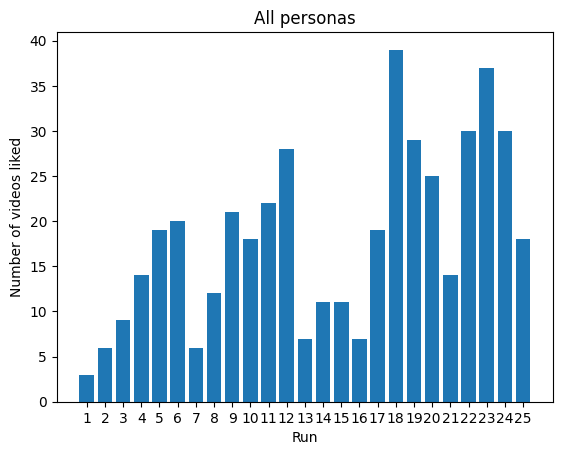

In [12]:
# Adding together the number of likes at x run for all personas.
all_likes = [sum(x) for x in zip(ah_likes_list,aw_likes_list,lg_likes_list,sl_likes_list,rx_likes_list,bb_likes_list)]
makeLikesBar(all_likes,'All personas')

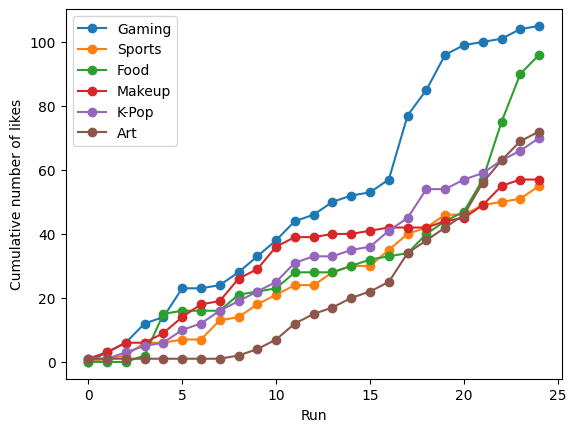

In [13]:
# Function to visualize the cumulative number of lives over all runs for
# each person as a line graph.
def makeCumLine(allResults):
  for i in allResults:
    cumulative_list = np.cumsum(i)
    x_values = np.arange(len(cumulative_list))

    if i == ah_likes_list:
      label='Gaming'
    elif i == aw_likes_list:
      label='Sports'
    elif i == lg_likes_list:
      label='Food'
    elif i == sl_likes_list:
      label='Makeup'
    elif i == bb_likes_list:
      label='Art'
    elif i == rx_likes_list:
      label='K-Pop'

    plt.plot(x_values, cumulative_list, marker='o',label=label)

  plt.xlabel('Run')
  plt.ylabel('Cumulative number of likes')
  plt.legend(loc="upper left")

  plt.show()

makeCumLine([ah_likes_list,aw_likes_list,lg_likes_list,sl_likes_list,rx_likes_list,bb_likes_list])

## <a name="jacc"> Jaccard Similarity </a>

Jaccard Index for the hashtags for each video compared to the original hashtag list over time visualized as a line plot. Completed by Amy.

In [14]:
# Predefined hashtag lists for each persona
amy_hashtags =['minecraft', 'gaming', 'gamer', "ps", 'playstation', 'videogames', 'game', 'xbox', 'games', 'twitch', 'fortnite', 'pc', 'memes', 'pcgaming', 'gamers', 'gamingcommunity', 'youtube', 'xboxone', 'gamergirl', 'nintendo', 'gta', 'callofduty', 'streamer', 'pubg', 'videogame', 'esports', 'bhfyp', 'meme', 'twitchstreamer', 'fortnitefunny', 'fortnitechapter5', 'gamingontiktok', 'gamelancer', 'pcgamer', 'pcgamer', 'diabloiv', 'gamingontiktok', 'epicgames', 'leaguetok', 'gamingmemes', 'minecraftclips', 'videogames', 'rocketleague', 'valorant', 'genshinimpact', 'warzone', 'gta5', 'roblox']
rachel_hashtags = ["kpop", "dance", "dancechallenge", "jenniesolo", "publicdance", "DanceTrends", "DanceTutorial", "DanceFitness", "KpopDance", "KpopChallenge", "KpopCover", "KpopMoves", "KpopChoreo", "KpopIdol", "KpopDanceTutorial", "KpopFancam", "KpopChoreography", "BTS", "EXO", "BLACKPINK", "blackpink", "TWICE", "RedVelvet", "NCT", "MAMAMOO", "ITZY", "SEVENTEEN","EVERGLOW", "BIGBANG", "SHINee"]
lillie_hashtags = ["Foodlover", "foodie", "foodtiktok", "cooking", "eating", "yummy", "delicious", "mukbang", "eat", "recipe", "tiktokfood", 'cooking', 'baking', 'garlic', 'steak','castiron', 'stainlesssteel', 'foodtiktok', 'food', 'foodvideo', 'foodie', 'chicken','recipe', 'easyrecipe', 'easyrecipes', 'asmrfood', 'italianfood', 'mexicanfood', 'asianfood', 'ramen', 'noodles', 'dinner', 'lunch', 'breakfast', 'dinnerideas', 'homecooking', 'comfortfood', 'recipesoftiktok', 'potato', 'pasta', 'chef', 'tastetest']
soo_hashtags = ["makeuptutorial", "makeup", "beauty", "makeupartist", "makeuphacks", "tutorial", "eyeliner", "makeuptransformation", "grwn", "mua", "skincare", "makeuproutine", "makeupchallenge", "makeup", "beauty", "launch", "newproduct", "grwm", "blush", "foundation", "sephora", "ultabeauty", "skincare", "hairstyle", "hairproducts", "concealer", "brushes", "lipstick", "bronzer", "contour", "mascara", "unboxing", "hair", "highlighter", "makeuptutorial", "lipgloss", "dyson", "gitter", "cosmetics", "makeupaddict", "beautyhacks", "beautycommunity", "makeupoftheday", "hairtutorial", "hairgoals"]
adelle_hashtags = ['sports', 'sport', 'baseball', 'basketball', 'football', 'mlb', 'nba', 'nfl', 'nhl', 'hockey', 'olympics', 'gymnastics', 'track', 'trackandfield', 'superbowl', 'fitness', 'training', 'gym', 'workout', 'motivation', 'athlete', 'exercise', 'boxing', 'mma', 'nike', 'team', 'sportswear', 'sportsnews', 'sportscenter', 'sportsbetting', 'fifa', 'soccer']
brooke_hashtags = ["Dance", "dancer", "music", "dancechallenge", "dancetutorial", "dancers", "lyric", "song", "spotify", "applemusic","art", "painting", "mural", "drawing", "artist", "digitalart", "sketchbook", "sketching", "pinterest", "illustration", "artjournal", "acrylic", "stilllife", "colorpencils", "animation", "artreel", "sketchingdaily", "artdaily", "artistic", "artwork", "artoftheday", "gouache", "oilpainting", "artgallery", "procreate", "prints", "ballpointpen", "mixedmedia"]

In [15]:
# Compute Jaccard Similarity based on formula
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [16]:
# Given a list of hashtags for each video in the seen list,
# compute the jaccard similarity with the predefined list of persona hashtags over time
def get_jaccard_scores(exp_hashtags, persona_hashtags):
  hashtag_jaccard = []
  for i in range(exp_hashtags.shape[0]):
    if pd.isna(exp_hashtags.iloc[i]['hashtag']) == False:
      if '%' in exp_hashtags.iloc[i]['hashtag']: #parse unicode characters
        li_experiment = urllib.parse.unquote(exp_hashtags.iloc[i]['hashtag']).replace(" ","").split(",")
      else:
        li_experiment = exp_hashtags.iloc[i]['hashtag'].replace(" ","").split(",")
      hashtag_jaccard.append(jaccard(li_experiment, persona_hashtags))
  return hashtag_jaccard


In [17]:
# Amy
amy_active_hashtag_jaccard = get_jaccard_scores(amy_active, amy_hashtags)
amy_control_hashtag_jaccard = get_jaccard_scores(amy_control, amy_hashtags)
# Rachel
rachel_active_hashtag_jaccard = get_jaccard_scores(rachel_active, rachel_hashtags)
rachel_control_hashtag_jaccard = get_jaccard_scores(rachel_control, rachel_hashtags)
# Lillie
lillie_active_hashtag_jaccard = get_jaccard_scores(lillie_active, lillie_hashtags)
lillie_control_hashtag_jaccard = get_jaccard_scores(lillie_control, lillie_hashtags)
# Soo
soo_active_hashtag_jaccard = get_jaccard_scores(soo_active, soo_hashtags)
soo_control_hashtag_jaccard = get_jaccard_scores(soo_control, soo_hashtags)
# Adelle
adelle_active_hashtag_jaccard = get_jaccard_scores(adelle_active, adelle_hashtags)
adelle_control_hashtag_jaccard = get_jaccard_scores(adelle_control, adelle_hashtags)
# Brooke
brooke_active_hashtag_jaccard = get_jaccard_scores(brooke_active, brooke_hashtags)
brooke_control_hashtag_jaccard = get_jaccard_scores(brooke_control, brooke_hashtags)

In [18]:
# Visualize the jaccard score over time
def jaccard_line_plot(active_jaccard_scores, control_jaccard_scores, persona):
  x_active = np.arange(start=1, stop=len(active_jaccard_scores)+1)
  x_control = np.arange(start=1, stop=len(control_jaccard_scores)+1)
  plt.plot(x_active, active_jaccard_scores, linewidth=3.0)
  plt.plot(x_control, control_jaccard_scores, linewidth=2.0)
  plt.title(persona)
  plt.legend(['Active', 'Control'])
  plt.xlabel("Time (Index)")
  plt.ylabel("Jaccard Index")
  #calculate equation for trendline
  z = np.polyfit(x_active, active_jaccard_scores, 1)
  p = np.poly1d(z)

  #add trendline to plot
  plt.plot(x_active, p(x_active))
  plt.show()
  #plt.plot(range(len(jaccard_scores)), jaccard_scores)

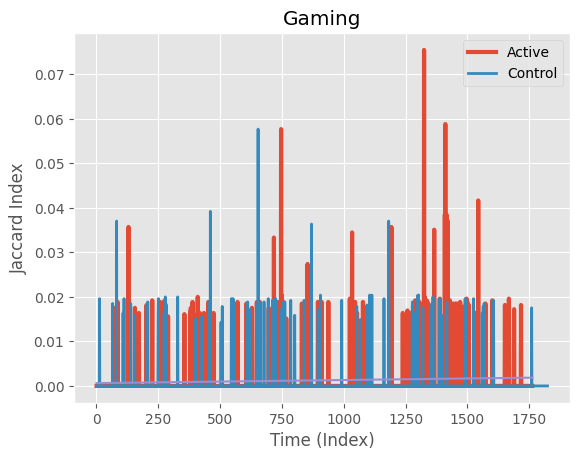

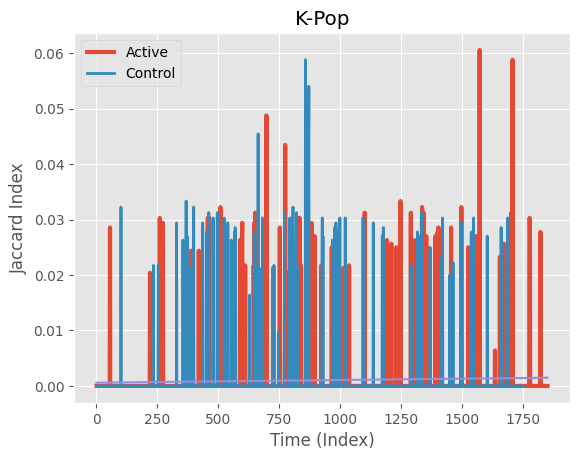

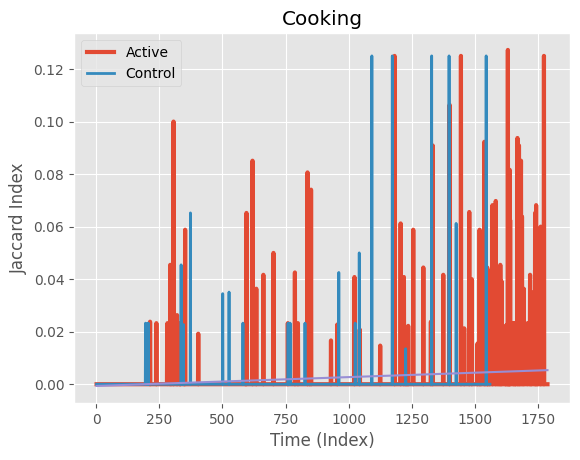

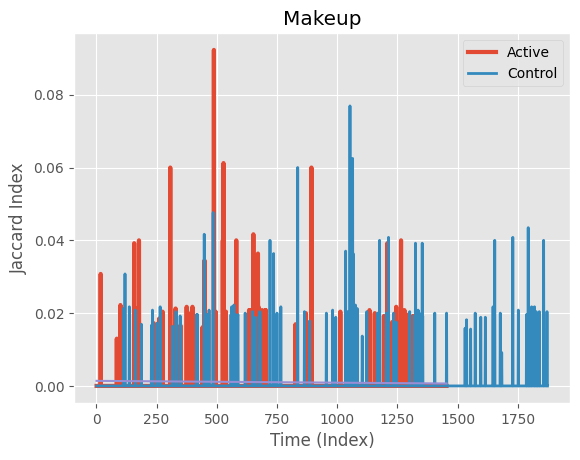

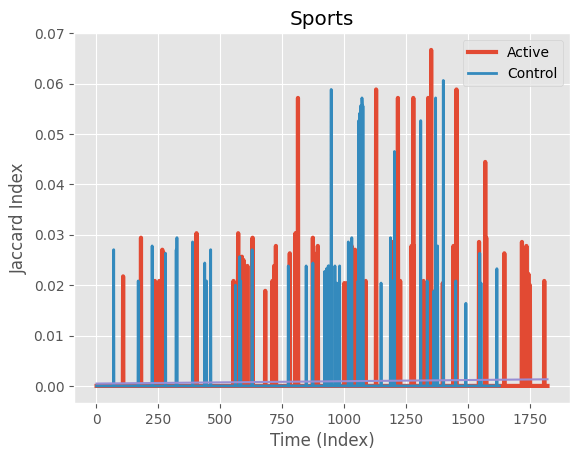

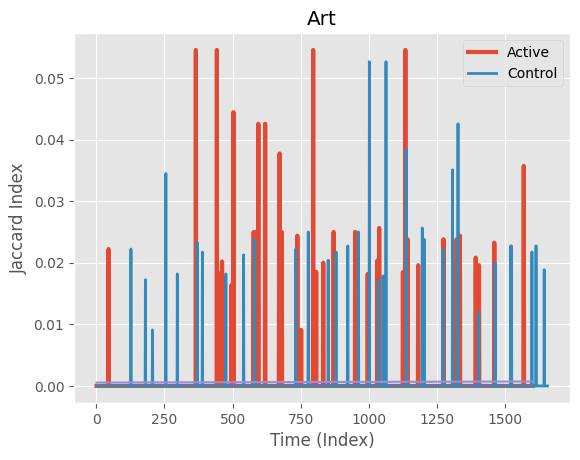

In [19]:
  # Generate a plot for each persona
  plt.style.use('ggplot')
  jaccard_line_plot(amy_active_hashtag_jaccard, amy_control_hashtag_jaccard, "Gaming")
  jaccard_line_plot(rachel_active_hashtag_jaccard, rachel_control_hashtag_jaccard, "K-Pop")
  jaccard_line_plot(lillie_active_hashtag_jaccard, lillie_control_hashtag_jaccard, "Cooking")
  jaccard_line_plot(soo_active_hashtag_jaccard, soo_control_hashtag_jaccard, "Makeup")
  jaccard_line_plot(adelle_active_hashtag_jaccard, adelle_control_hashtag_jaccard, "Sports")
  jaccard_line_plot(brooke_active_hashtag_jaccard, brooke_control_hashtag_jaccard, "Art")


## <a name="hashfreq"> Hashtag Frequency </a>

Histogram of top 5/10 most frequent hashtags shown in the complete feed for control and active accounts. Completed by Soo.

In [20]:
# clean na and parse special characters in hashtags

def parse_hashtags(control_data):
    c_hashtags = control_data['hashtag']
    #print(c_hashtags)
    clean_hashtag = c_hashtags[pd.isna(c_hashtags) == False] #cleaned data, has no NAs
    for i in range(len(clean_hashtag)):
      if '%' in str(clean_hashtag.iloc[i]): #parse unicode characters
        clean_hashtag.iloc[i] = urllib.parse.unquote(clean_hashtag.iloc[i])
        #print(clean_hashtag.iloc[i]) #parsing complete
    return clean_hashtag

#parse_hashtags(amy_control)
#soo_control['hashtag'].isna().head () #33 missing values

In [21]:
#referred from tutorial
allHashtagsCnt = Counter() # global variable that will be changed through the helper function

def countAllHashtags(cell):
    """
    Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object
    (a global variable) to keep track of all hashtags.
    """
    if type(cell) == str: # avoid NaN values, which are float
        htList = [el.strip() for el in cell.split(',')] # prepare individual hashtags
        allHashtagsCnt.update(htList) # method update of Counter takes a list and updates all keys

In [22]:
# parse and count most frequent hashtags

# Amy
amy_c_hashtag = parse_hashtags(amy_control)
_ = amy_c_hashtag.apply(countAllHashtags)
amy_c_rank = allHashtagsCnt.most_common(20)
#print(amy_c_rank)

allHashtagsCnt = Counter() #reset Counter

amy_a_hashtag = parse_hashtags(amy_active)
_ = amy_a_hashtag.apply(countAllHashtags)
amy_a_rank = allHashtagsCnt.most_common(20)
#print(amy_a_rank)

# Adelle
adelle_c_hashtag = parse_hashtags(adelle_control)
_ = adelle_c_hashtag.apply(countAllHashtags)
adelle_c_rank = allHashtagsCnt.most_common(20)
#print(adelle_c_rank)

allHashtagsCnt = Counter() #reset Counter

adelle_a_hashtag = parse_hashtags(adelle_active)
_ = adelle_a_hashtag.apply(countAllHashtags)
adelle_a_rank = allHashtagsCnt.most_common(20)
#print(adelle_a_rank)

# Brooke
brooke_c_hashtag = parse_hashtags(brooke_control)
_ = brooke_c_hashtag.apply(countAllHashtags)
brooke_c_rank = allHashtagsCnt.most_common(20)
#print(brooke_c_rank)

allHashtagsCnt = Counter() #reset Counter

brooke_a_hashtag = parse_hashtags(brooke_active)
_ = brooke_a_hashtag.apply(countAllHashtags)
brooke_a_rank = allHashtagsCnt.most_common(20)
#print(brooke_a_rank)

# Lillie
lillie_c_hashtag = parse_hashtags(lillie_control)
_ = lillie_c_hashtag.apply(countAllHashtags)
lillie_c_rank = allHashtagsCnt.most_common(20)
#print(lillie_c_rank)

allHashtagsCnt = Counter() #reset Counter

lillie_a_hashtag = parse_hashtags(lillie_active)
_ = lillie_a_hashtag.apply(countAllHashtags)
lillie_a_rank = allHashtagsCnt.most_common(20)
#print(lillie_a_rank)

# Rachel
rachel_c_hashtag = parse_hashtags(rachel_control)
_ = rachel_c_hashtag.apply(countAllHashtags)
rachel_c_rank = allHashtagsCnt.most_common(20)
#print(rachel_c_rank)

allHashtagsCnt = Counter() #reset Counter

rachel_a_hashtag = parse_hashtags(rachel_active)
_ = rachel_a_hashtag.apply(countAllHashtags)
rachel_a_rank = allHashtagsCnt.most_common(20)
#print(rachel_a_rank)

# Soo
soo_c_hashtag = parse_hashtags(soo_control)
_ = soo_c_hashtag.apply(countAllHashtags)
soo_c_rank = allHashtagsCnt.most_common(20)
#print(soo_c_rank)

allHashtagsCnt = Counter() #reset Counter

soo_a_hashtag = parse_hashtags(soo_active)
_ = soo_a_hashtag.apply(countAllHashtags)
soo_a_rank = allHashtagsCnt.most_common(20)
#print(soo_a_rank)

<ipython-input-23-b6fae285b9bd>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(hashtags, rotation=90)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12442 (\N{COMBINING KATAKANA-HIRAGANA SEMI-VOICED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


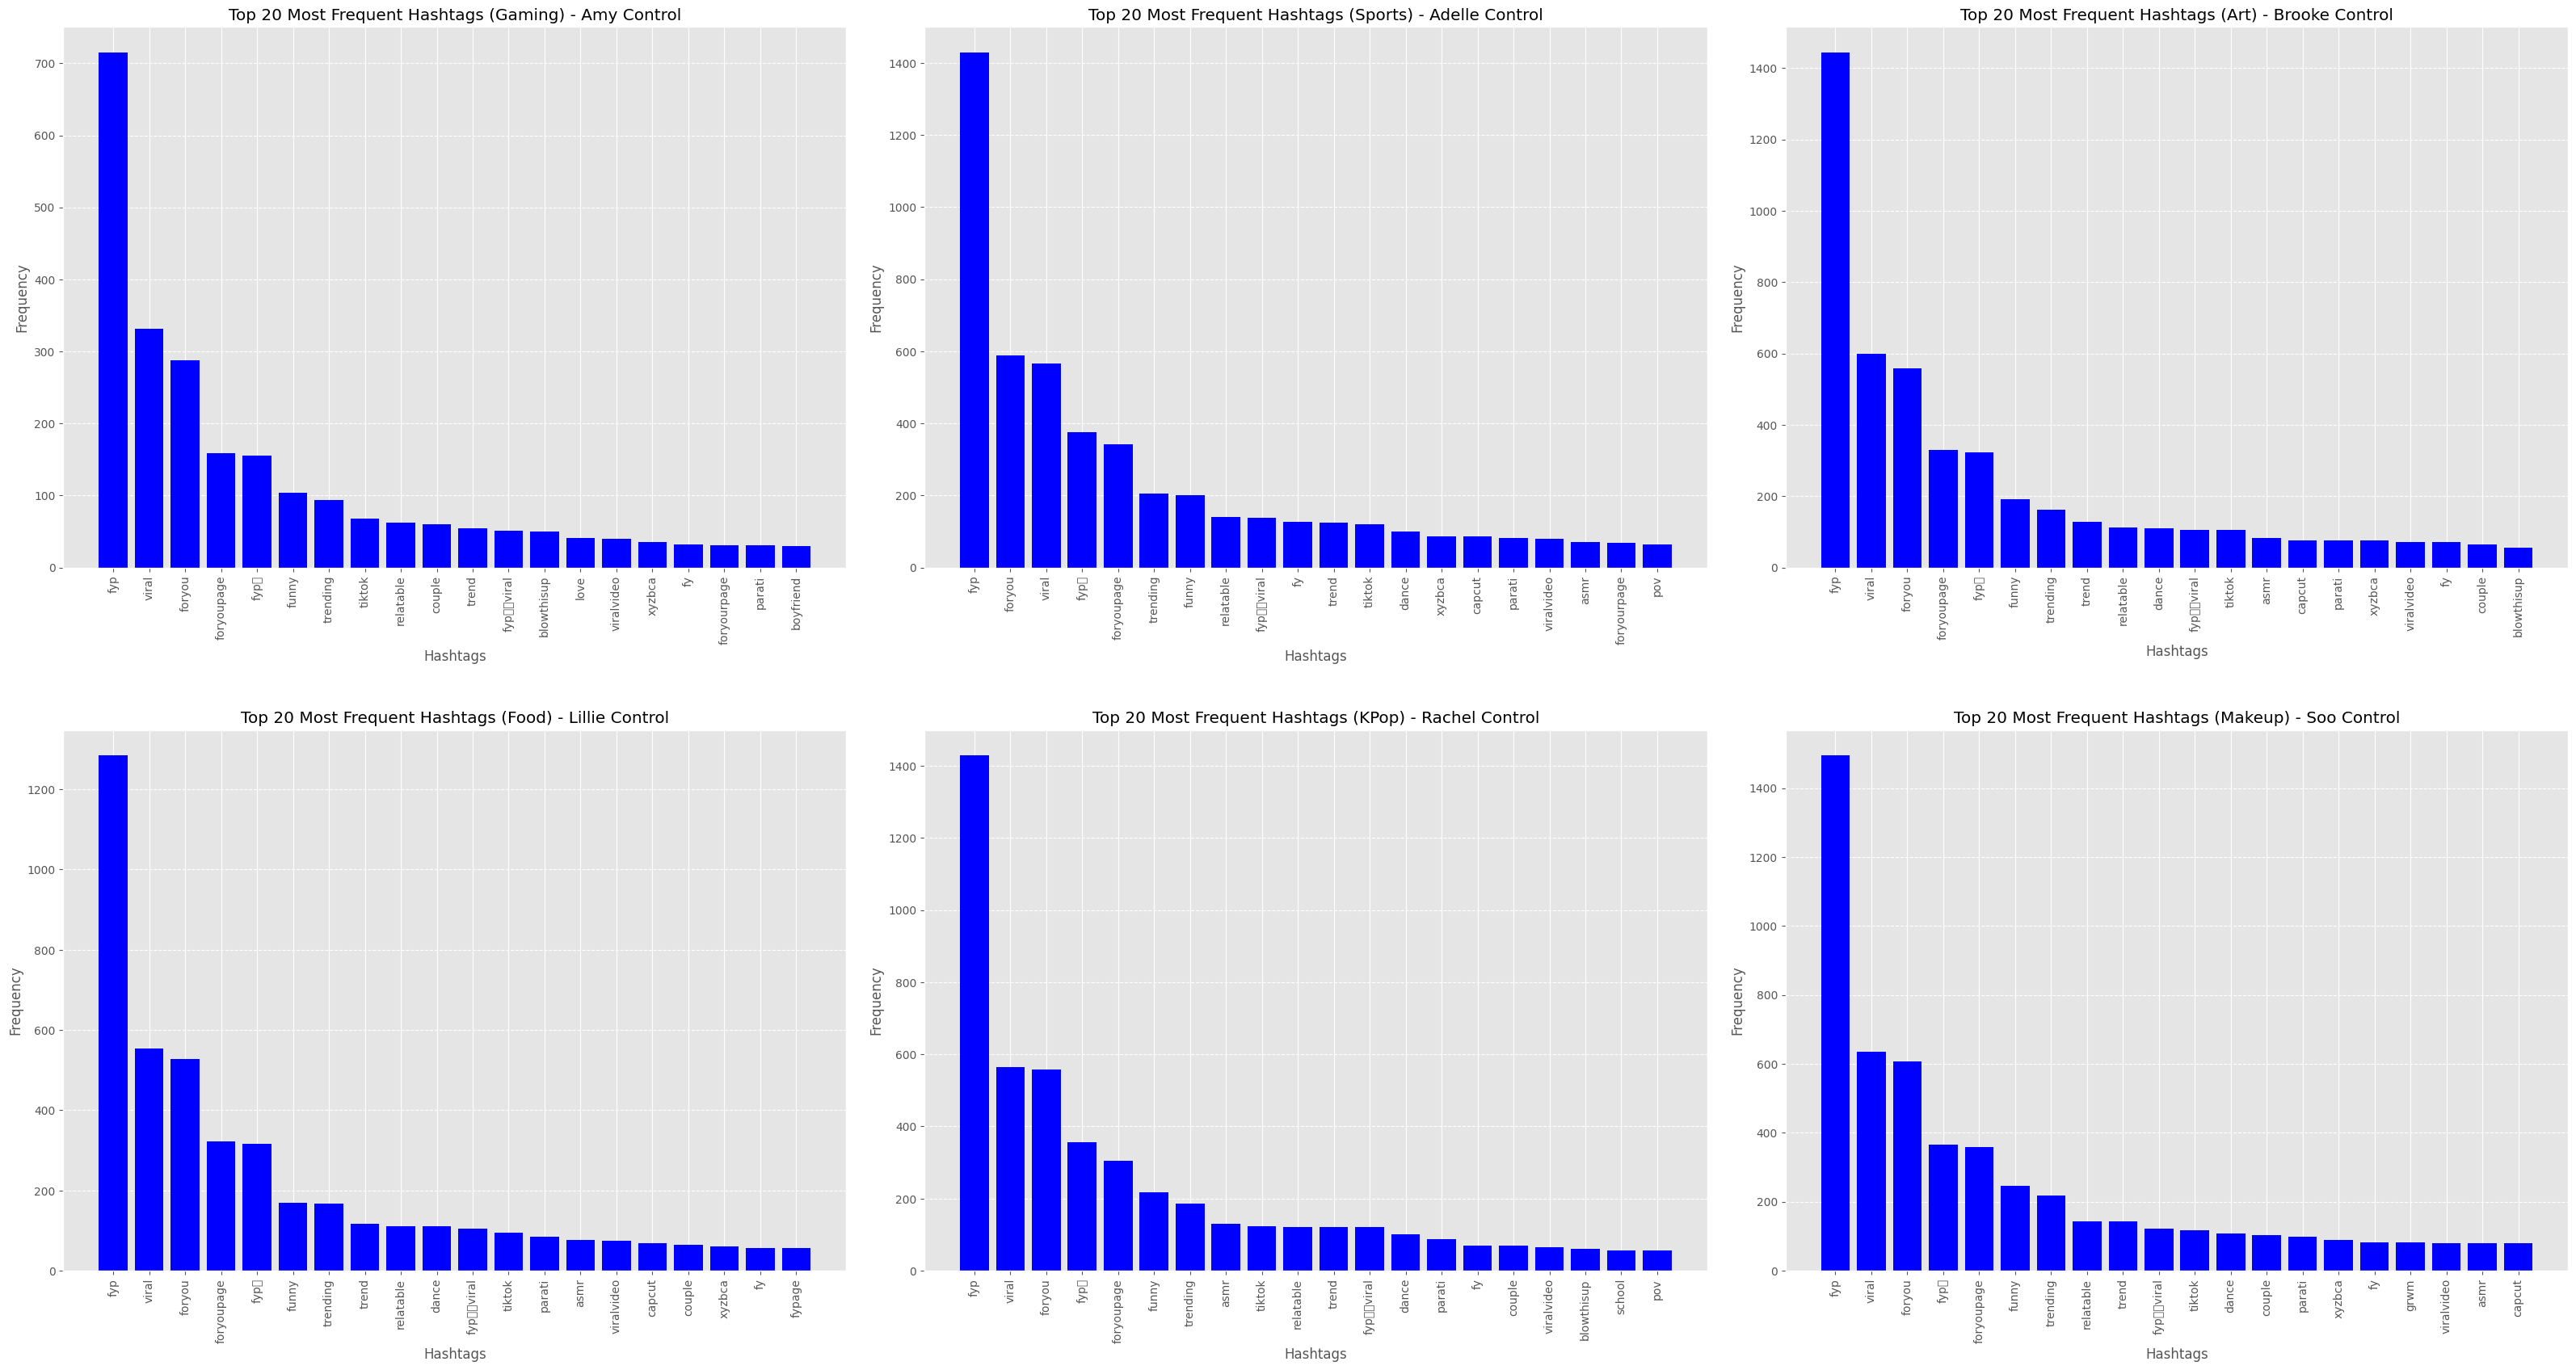

In [23]:
# plot top 20 hashtags

fig, axes = plt.subplots(2, 3, figsize=(40, 20))
axes = axes.flatten()

for i, (data, title, persona) in enumerate(zip([amy_c_rank, adelle_c_rank, brooke_c_rank, lillie_c_rank, rachel_c_rank, soo_c_rank],
                                       ['Amy', 'Adelle', 'Brooke', 'Lillie', 'Rachel', 'Soo'], ['Gaming', 'Sports', 'Art', 'Food', 'KPop', 'Makeup'])):
    hashtags, counts = zip(*data)
    axes[i].bar(hashtags, counts, color='blue')
    axes[i].set_title(f'Top 20 Most Frequent Hashtags ({persona}) - {title} Control')
    axes[i].set_xlabel('Hashtags')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--')
    axes[i].set_xticklabels(hashtags, rotation=90)


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.3)  # Increase the horizontal and vertical spacing
plt.show()


<ipython-input-24-a2572102e6d9>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(hashtags, rotation=90)


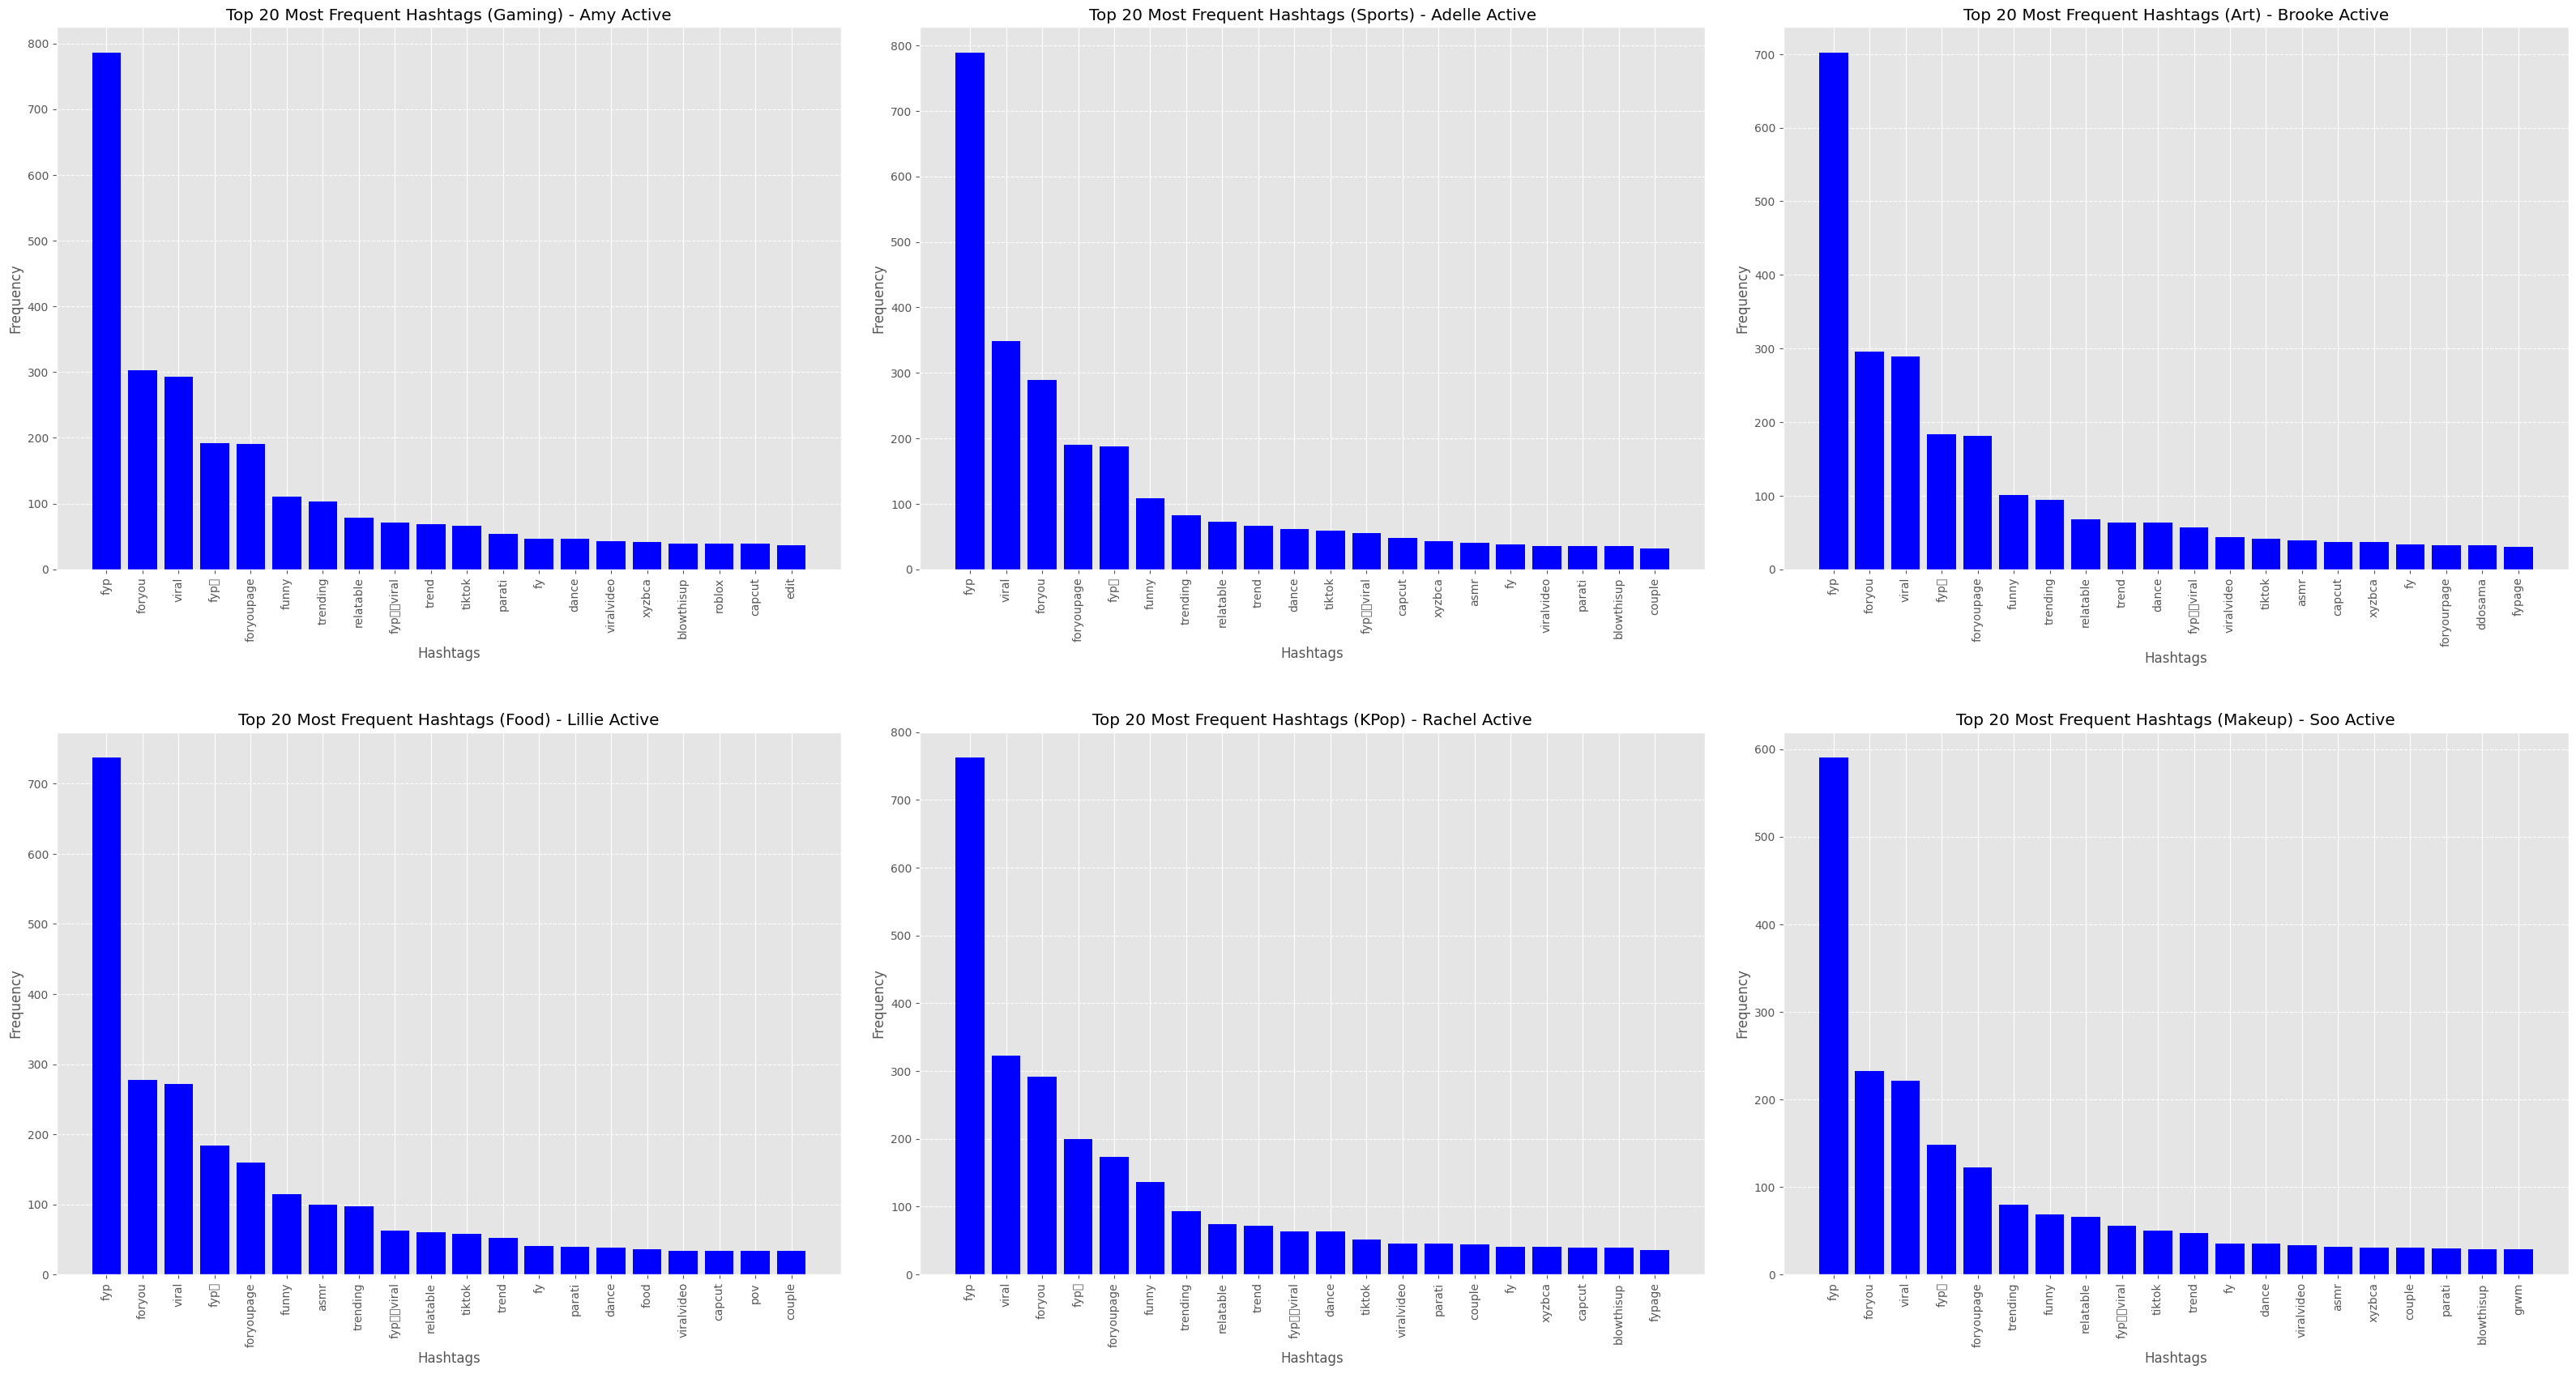

In [24]:
# plot top 20 hashtags active

fig, axes = plt.subplots(2, 3, figsize=(40, 20))
axes = axes.flatten()

for i, (data, title, persona) in enumerate(zip([amy_a_rank, adelle_a_rank, brooke_a_rank, lillie_a_rank, rachel_a_rank, soo_a_rank],
                                       ['Amy', 'Adelle', 'Brooke', 'Lillie', 'Rachel', 'Soo'], ['Gaming', 'Sports', 'Art', 'Food', 'KPop', 'Makeup'])):
    hashtags, counts = zip(*data)
    axes[i].bar(hashtags, counts, color='blue')
    axes[i].set_title(f'Top 20 Most Frequent Hashtags ({persona}) - {title} Active')
    axes[i].set_xlabel('Hashtags')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--')
    axes[i].set_xticklabels(hashtags, rotation=90)


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.3)  # Increase the horizontal and vertical spacing
plt.show()


In [25]:
# parse hashtags and find frequency for liked videos

# Amy
amy_likes = parse_hashtags(ah_likes)
_ = amy_likes.apply(countAllHashtags) #if you get a type error, restart the file and run all again
amy_like = allHashtagsCnt.most_common(20)
#print(amy_like)

allHashtagsCnt = Counter() #reset Counter

# Adelle
adelle_likes = parse_hashtags(aw_likes)
_ = adelle_likes.apply(countAllHashtags)
adelle_like = allHashtagsCnt.most_common(20)
#print(adelle_like)

allHashtagsCnt = Counter() #reset Counter

# Brooke
brooke_likes = parse_hashtags(bb_likes)
_ = brooke_likes.apply(countAllHashtags)
brooke_like = allHashtagsCnt.most_common(20)
#print(brooke_like)

allHashtagsCnt = Counter() #reset Counter

# Lillie
lillie_likes = parse_hashtags(lg_likes)
_ = lillie_likes.apply(countAllHashtags)
lillie_like = allHashtagsCnt.most_common(20)
#print(lillie_like)

allHashtagsCnt = Counter() #reset Counter

# Rachel
rachel_likes = parse_hashtags(rx_likes)
_ = rachel_likes.apply(countAllHashtags)
rachel_like = allHashtagsCnt.most_common(20)
#print(rachel_like)

allHashtagsCnt = Counter() #reset Counter

# Soo
soo_likes = parse_hashtags(sl_likes)
_ = soo_likes.apply(countAllHashtags)
soo_like = allHashtagsCnt.most_common(20)
#print(soo_like)

<ipython-input-26-a5461d95147b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(hashtags, rotation=90)


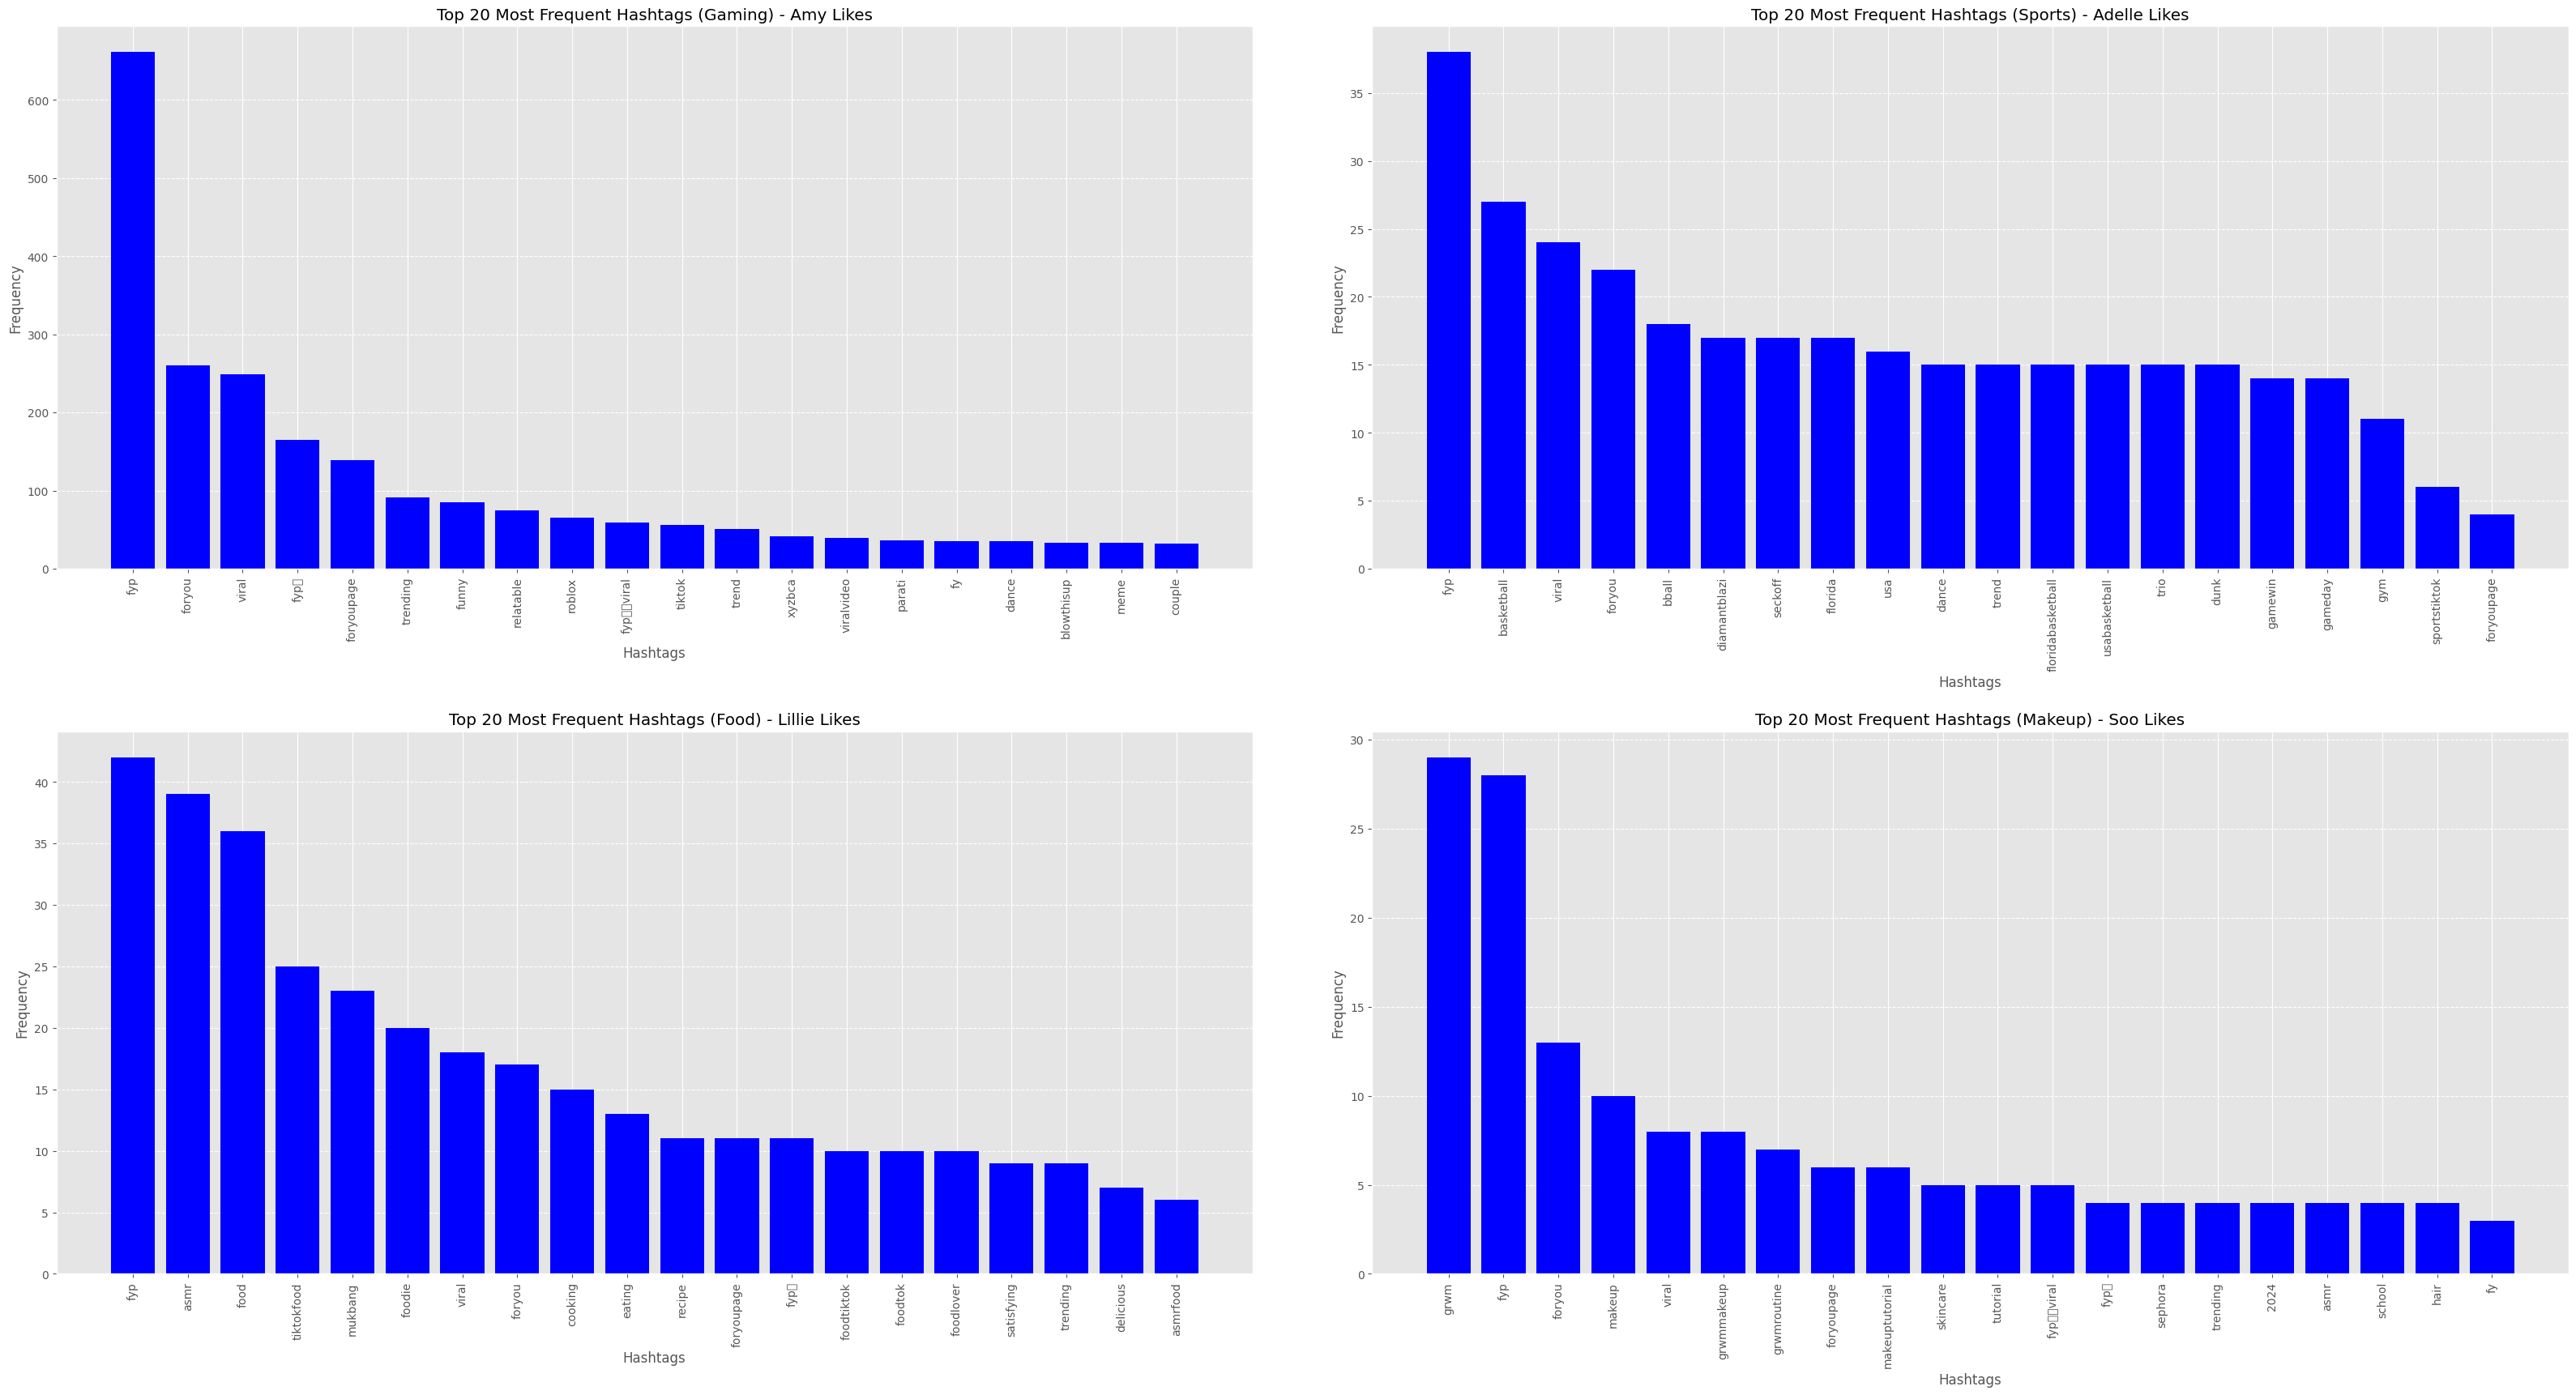

In [26]:
# plot freq hashtags liked videos

fig, axes = plt.subplots(2, 2, figsize=(40, 20))
axes = axes.flatten()

for i, (data, title, persona) in enumerate(zip([amy_like, adelle_like, lillie_like, soo_like],
                                       ['Amy', 'Adelle', 'Lillie', 'Soo'], ['Gaming', 'Sports', 'Food', 'Makeup'])):
    hashtags, counts = zip(*data)
    axes[i].bar(hashtags, counts, color='blue')
    axes[i].set_title(f'Top 20 Most Frequent Hashtags ({persona}) - {title} Likes')
    axes[i].set_xlabel('Hashtags')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--')
    axes[i].set_xticklabels(hashtags, rotation=90)


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.3)  # Increase the horizontal and vertical spacing
plt.show()

<ipython-input-27-1b9ee72fb4a5>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(hashtags, rotation=90)


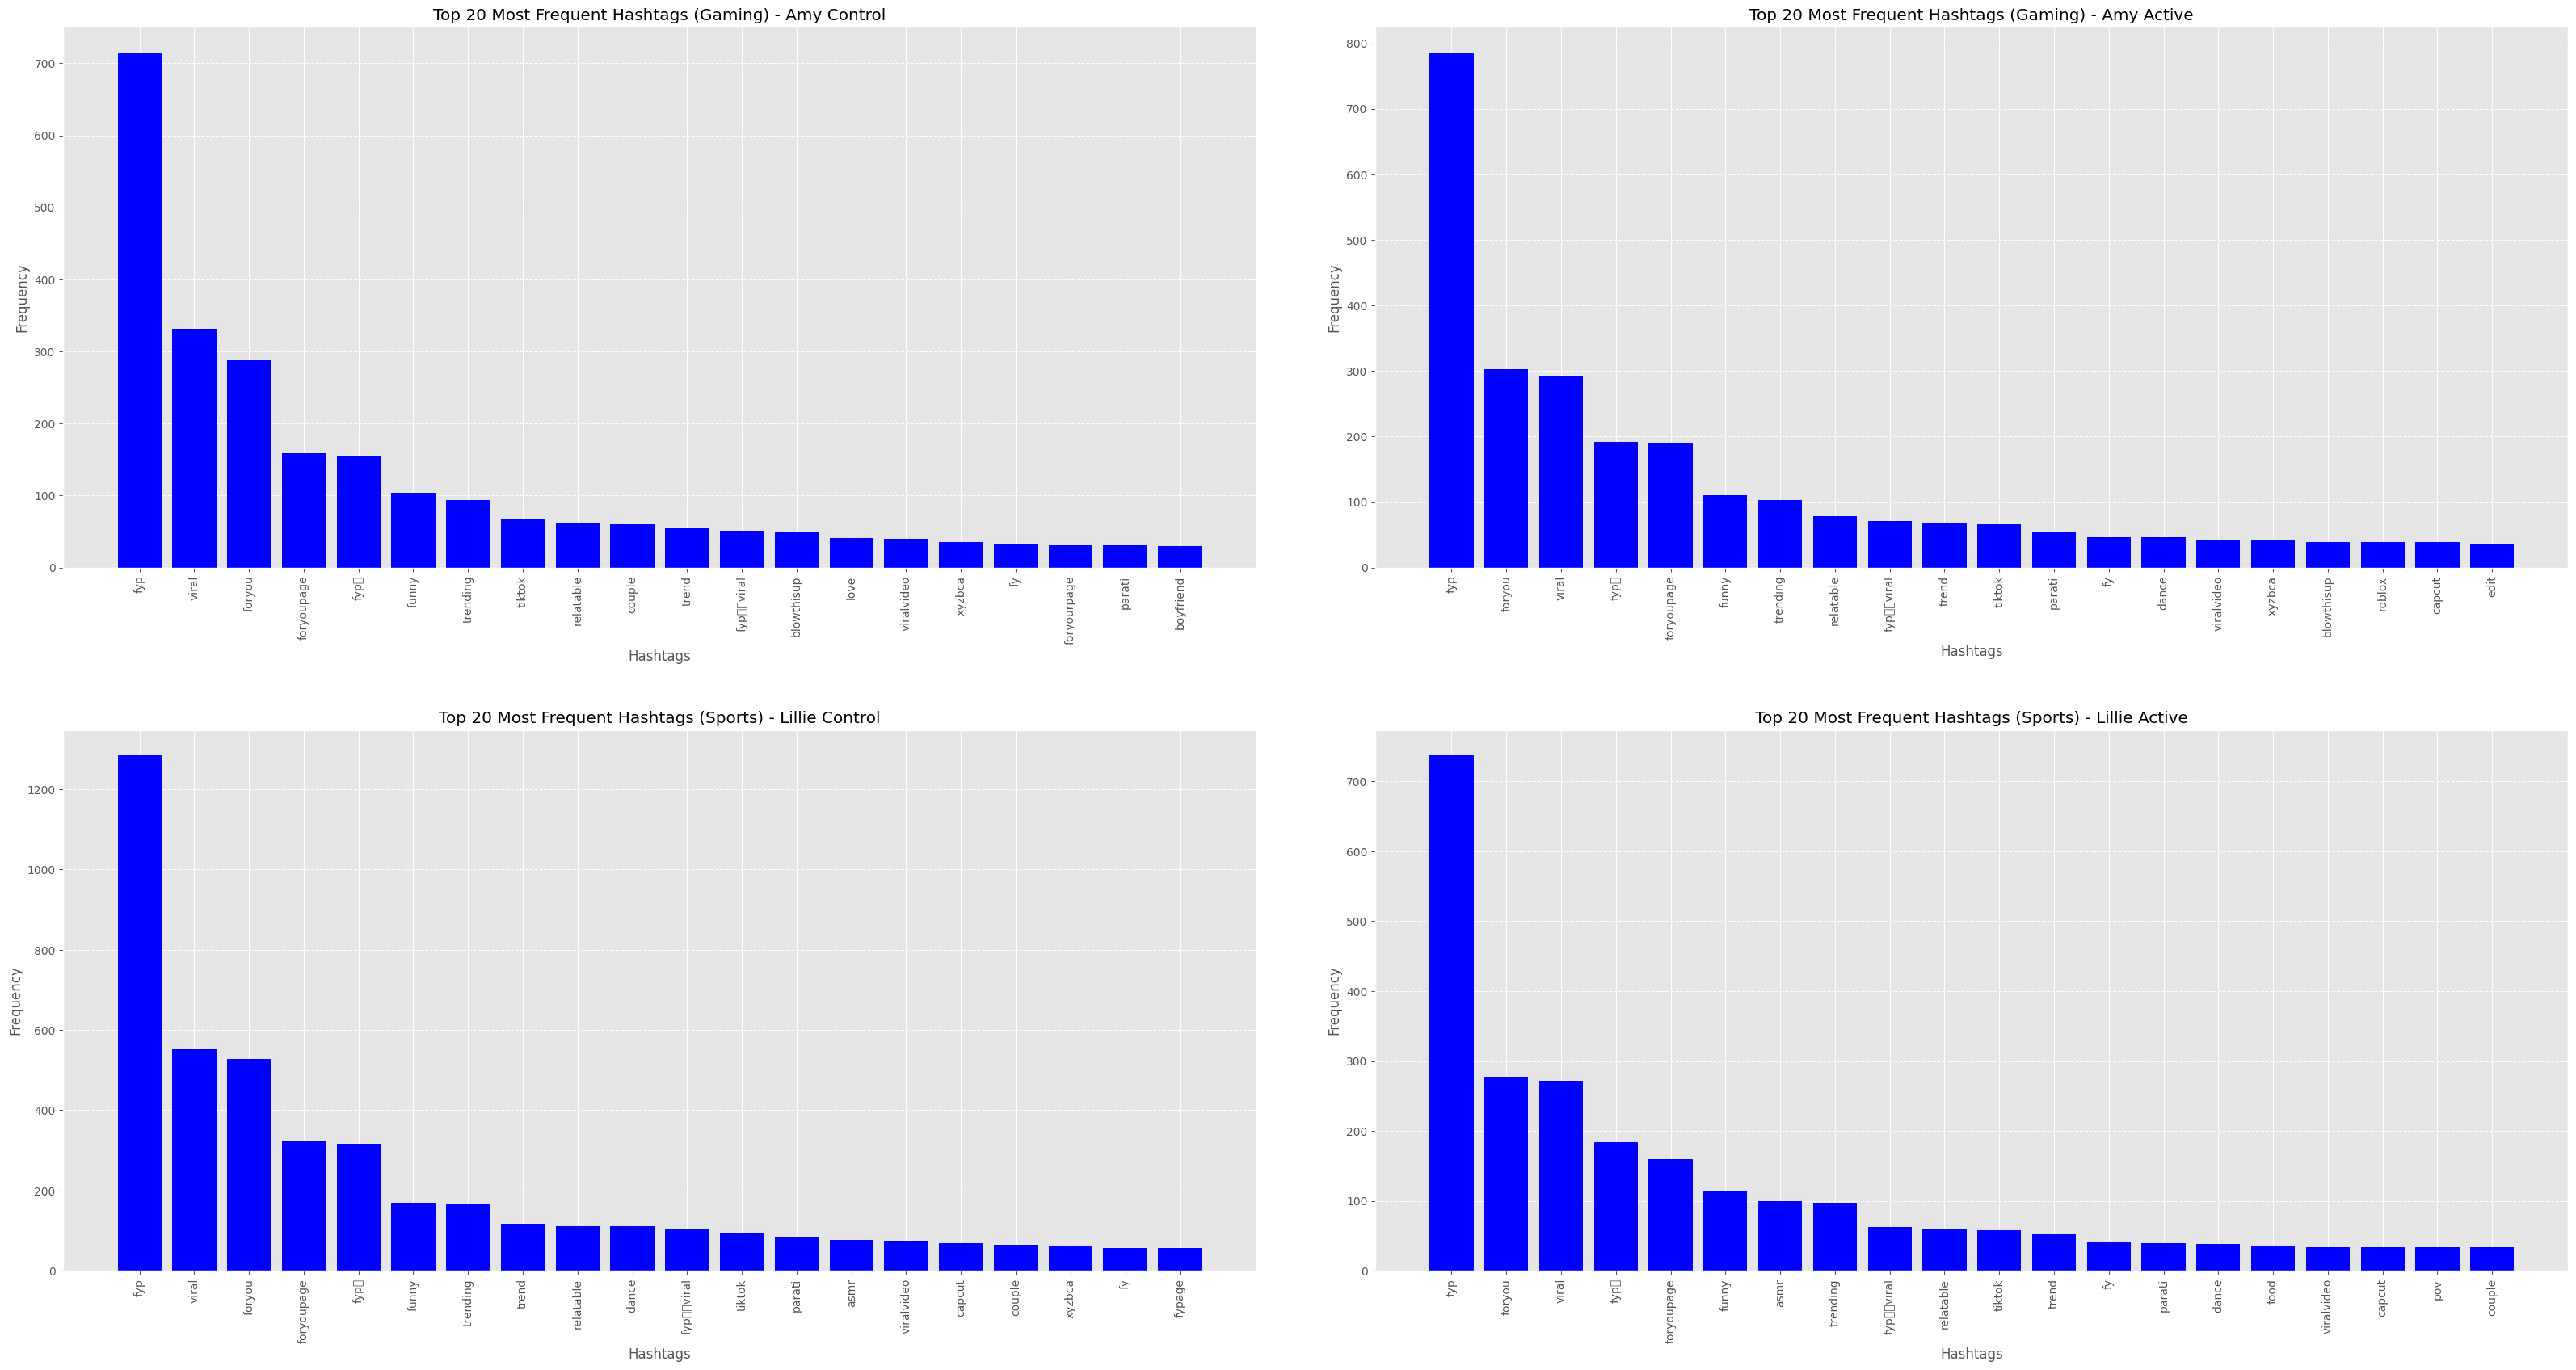

In [27]:
# plot control and active in the same figure

fig, axes = plt.subplots(2, 2, figsize=(40, 20))
axes = axes.flatten()

for i, (data, title, persona, type) in enumerate(zip([amy_c_rank, amy_a_rank, lillie_c_rank, lillie_a_rank],
                                       ['Amy', 'Amy', 'Lillie', 'Lillie'], ['Gaming', 'Gaming', 'Sports', 'Sports'], ['Control', 'Active', 'Control', 'Active'])):
    hashtags, counts = zip(*data)
    axes[i].bar(hashtags, counts, color='blue')
    axes[i].set_title(f'Top 20 Most Frequent Hashtags ({persona}) - {title} {type}')
    axes[i].set_xlabel('Hashtags')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--')
    axes[i].set_xticklabels(hashtags, rotation=90)


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.3)  # Increase the horizontal and vertical spacing
plt.show()

## <a name="musfreq"> Music Frequency </a>

Histogram of top 5/10 most frequent music shown in the complete feed for control and active accounts. Completed by Rachel.

In [28]:
# 6 graphs for control data
# Amy music
amy_music = amy_control['music']
amy_music = amy_music.dropna()
amy_counts = amy_music.value_counts()
amy_music_top = amy_counts.head(10)
amy_music_top

# Adelle music
ad_music = adelle_control['music']
ad_music = ad_music.dropna()
ad_counts = ad_music.value_counts()
ad_music_top = ad_counts.head(10)

# Brooke music
b_music = brooke_control['music']
b_music = b_music.dropna()
b_counts = b_music.value_counts()
b_music_top = b_counts.head(10)

# Lillie music
l_music = lillie_control['music']
l_music = l_music.dropna()
l_counts = l_music.value_counts()
l_music_top = l_counts.head(10)

# Rachel music
r_music = rachel_control['music']
r_music = r_music.dropna()
r_counts = r_music.value_counts()
r_music_top = r_counts.head(10)

# Soo music
s_music = soo_control['music']
s_music = s_music.dropna()
s_counts = s_music.value_counts()
s_music_top = s_counts.head(10)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129396 (\N{FACE WITH UNEVEN EYES AND WAVY MOUTH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


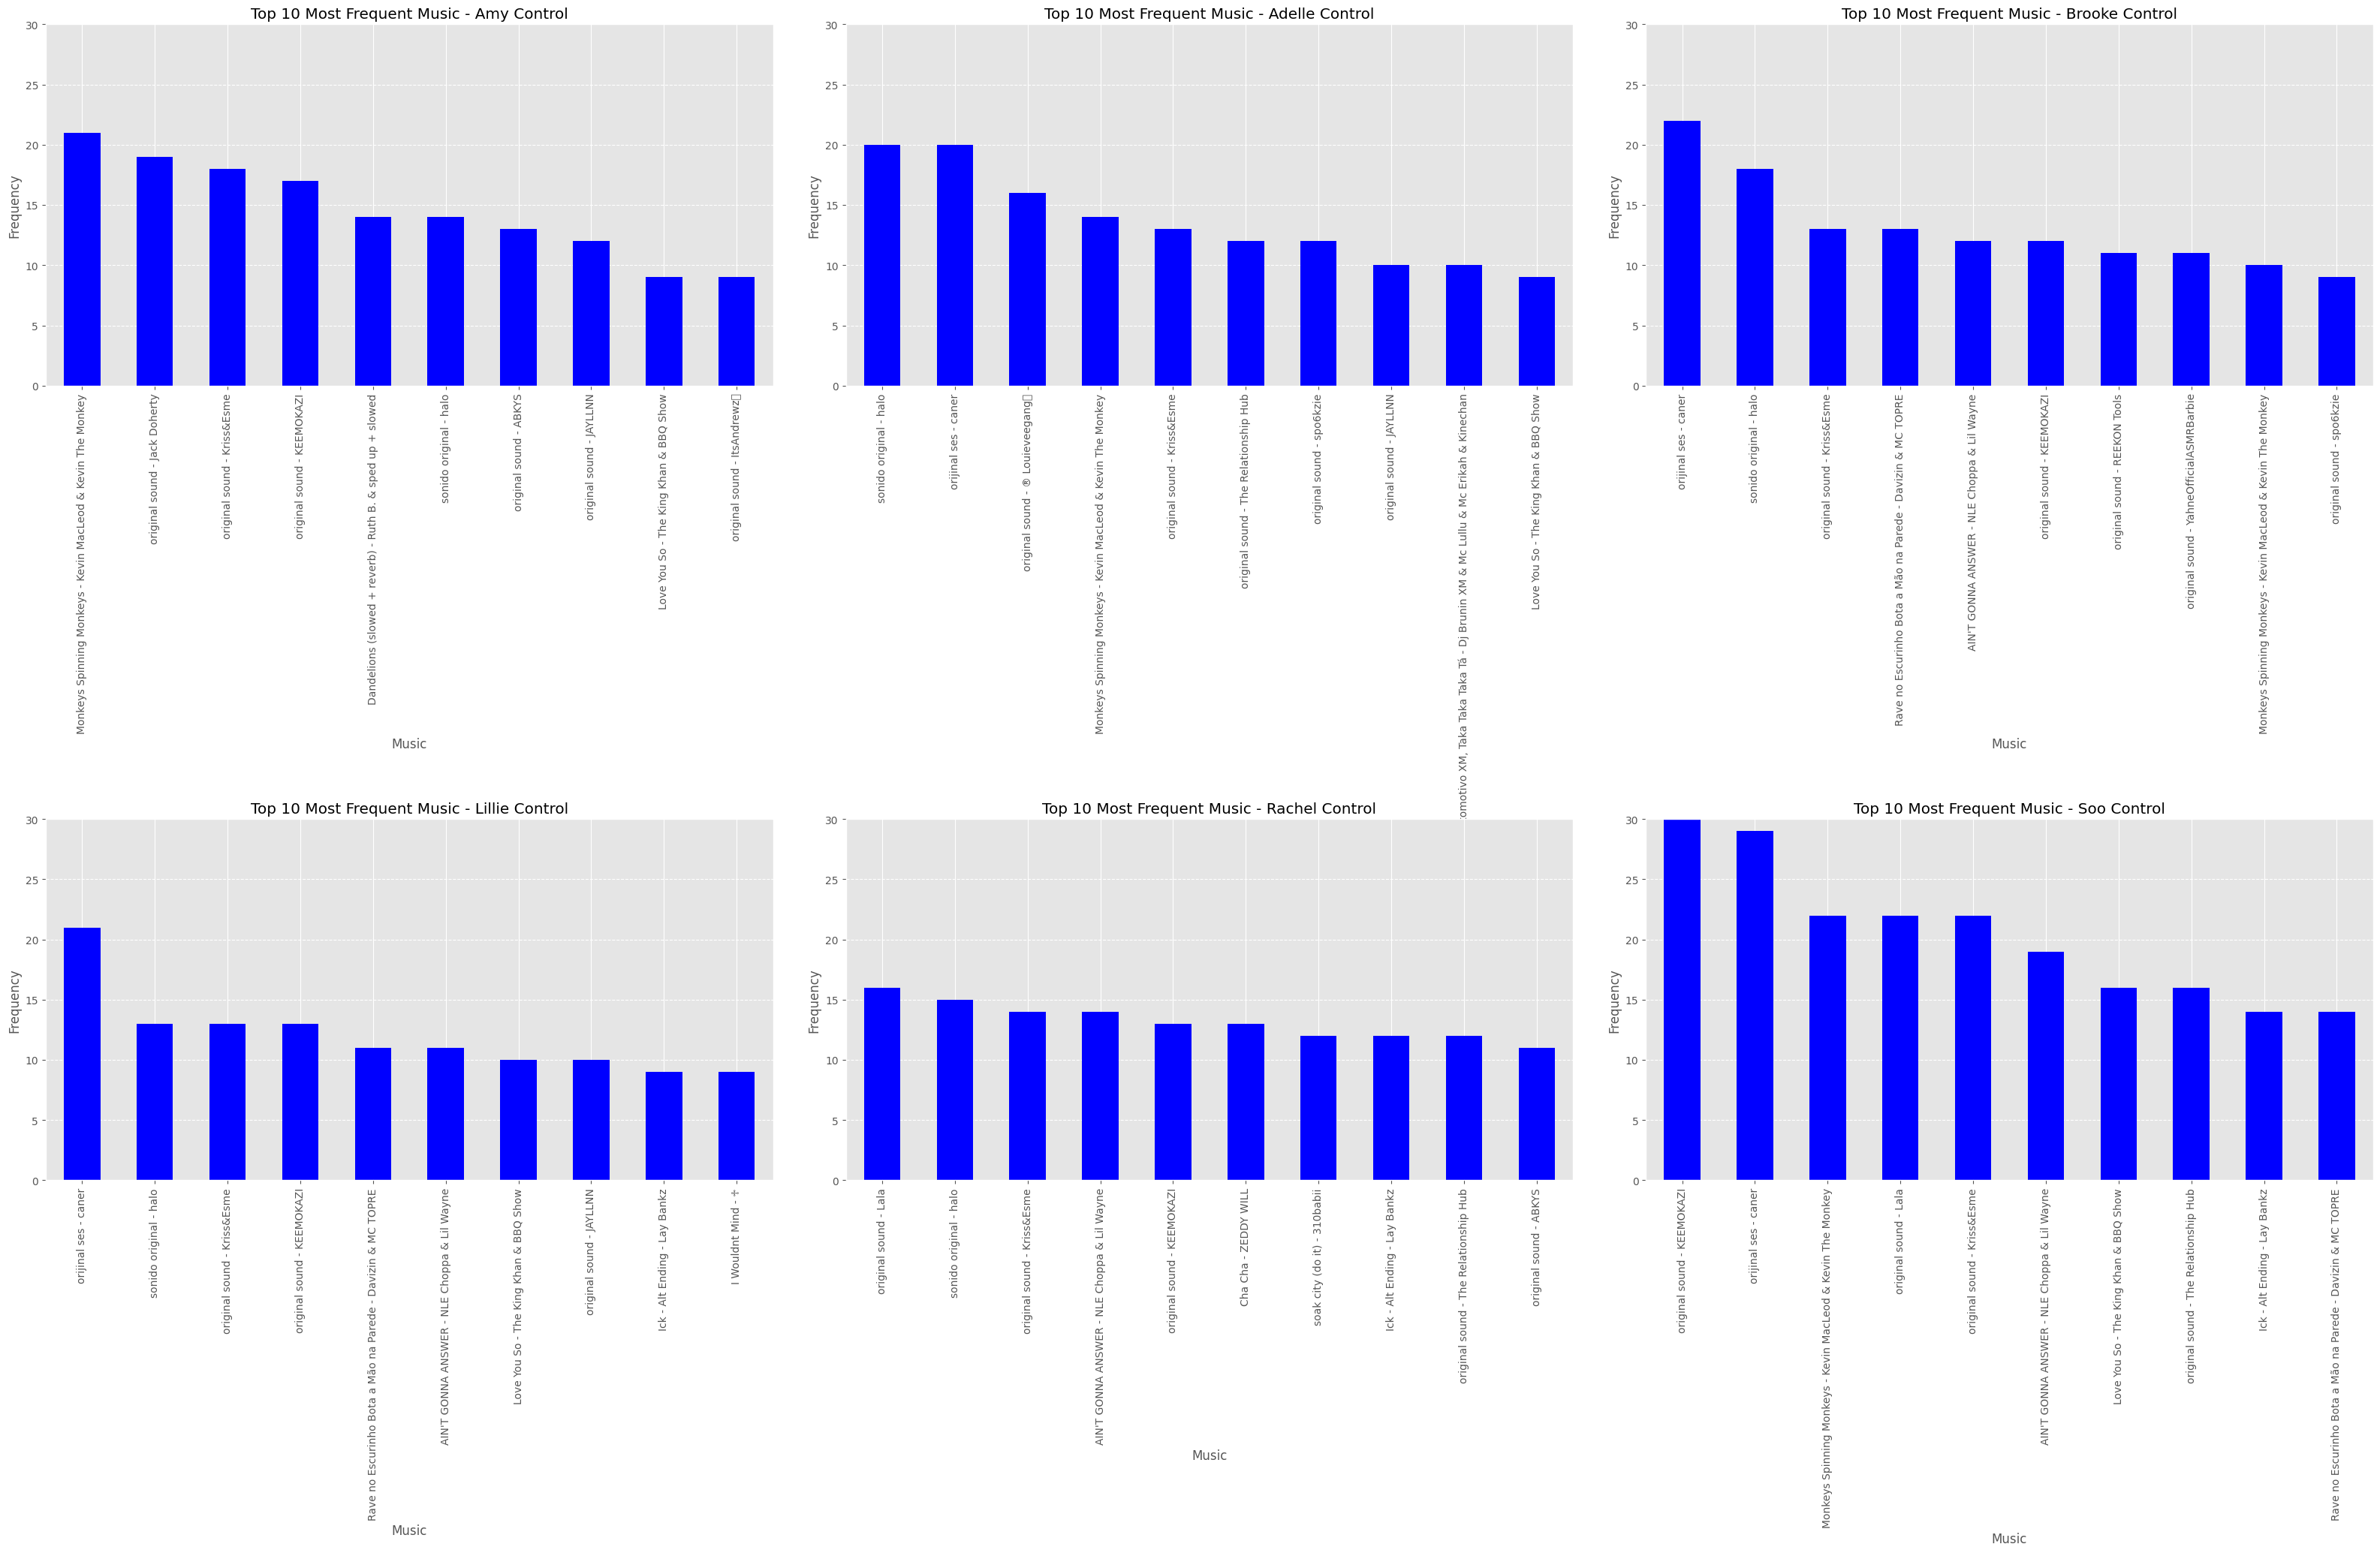

In [29]:
# plots top 10 most freq music
fig, axes = plt.subplots(2, 3, figsize=(40, 20))
axes = axes.flatten()

for i, (data, title) in enumerate(zip([amy_music_top, ad_music_top, b_music_top, l_music_top, r_music_top, s_music_top],
                                       ['Amy', 'Adelle', 'Brooke', 'Lillie', 'Rachel', 'Soo'])):
    data.plot(kind='bar', color='blue', ax=axes[i])
    axes[i].set_title(f'Top 10 Most Frequent Music - {title} Control')
    axes[i].set_xlabel('Music')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--')
    axes[i].set_ylim(0, 30)


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=1.2)  # Increase the horizontal and vertical spacing
plt.show()


In [30]:
# 6 graphs for active data
# Amy music
amy_music_active = amy_active['music']
amy_music_active = amy_music_active[pd.notna(amy_music_active)]
amy_counts_active = amy_music_active.value_counts()
amy_music_top_active = amy_counts_active.head(10)

# Adelle music
ad_music_active = adelle_active['music']
ad_music_active = ad_music_active[pd.notna(ad_music_active)]
ad_counts_active = ad_music_active.value_counts()
ad_music_top_active = ad_counts_active.head(10)

# Brooke music
b_music_active = brooke_active['music']
b_music_active = b_music_active[pd.notna(b_music_active)]
b_counts_active = b_music_active.value_counts()
b_music_top_active = b_counts_active.head(10)

# Lillie music
l_music_active = lillie_active['music']
l_music_active = l_music_active[pd.notna(l_music_active)]
l_counts_active = l_music_active.value_counts()
l_music_top_active = l_counts_active.head(10)

# Rachel music
r_music_active = rachel_active['music']
r_music_active = r_music_active[pd.notna(r_music_active)]
r_counts_active = r_music_active.value_counts()
r_music_top_active = r_counts_active.head(10)

# Soo music
s_music_active = soo_active['music']
s_music_active = s_music_active[pd.notna(s_music_active)]
s_counts_active = s_music_active.value_counts()
s_music_top_active = s_counts_active.head(10)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128509 (\N{STATUE OF LIBERTY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129708 (\U0001faac) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


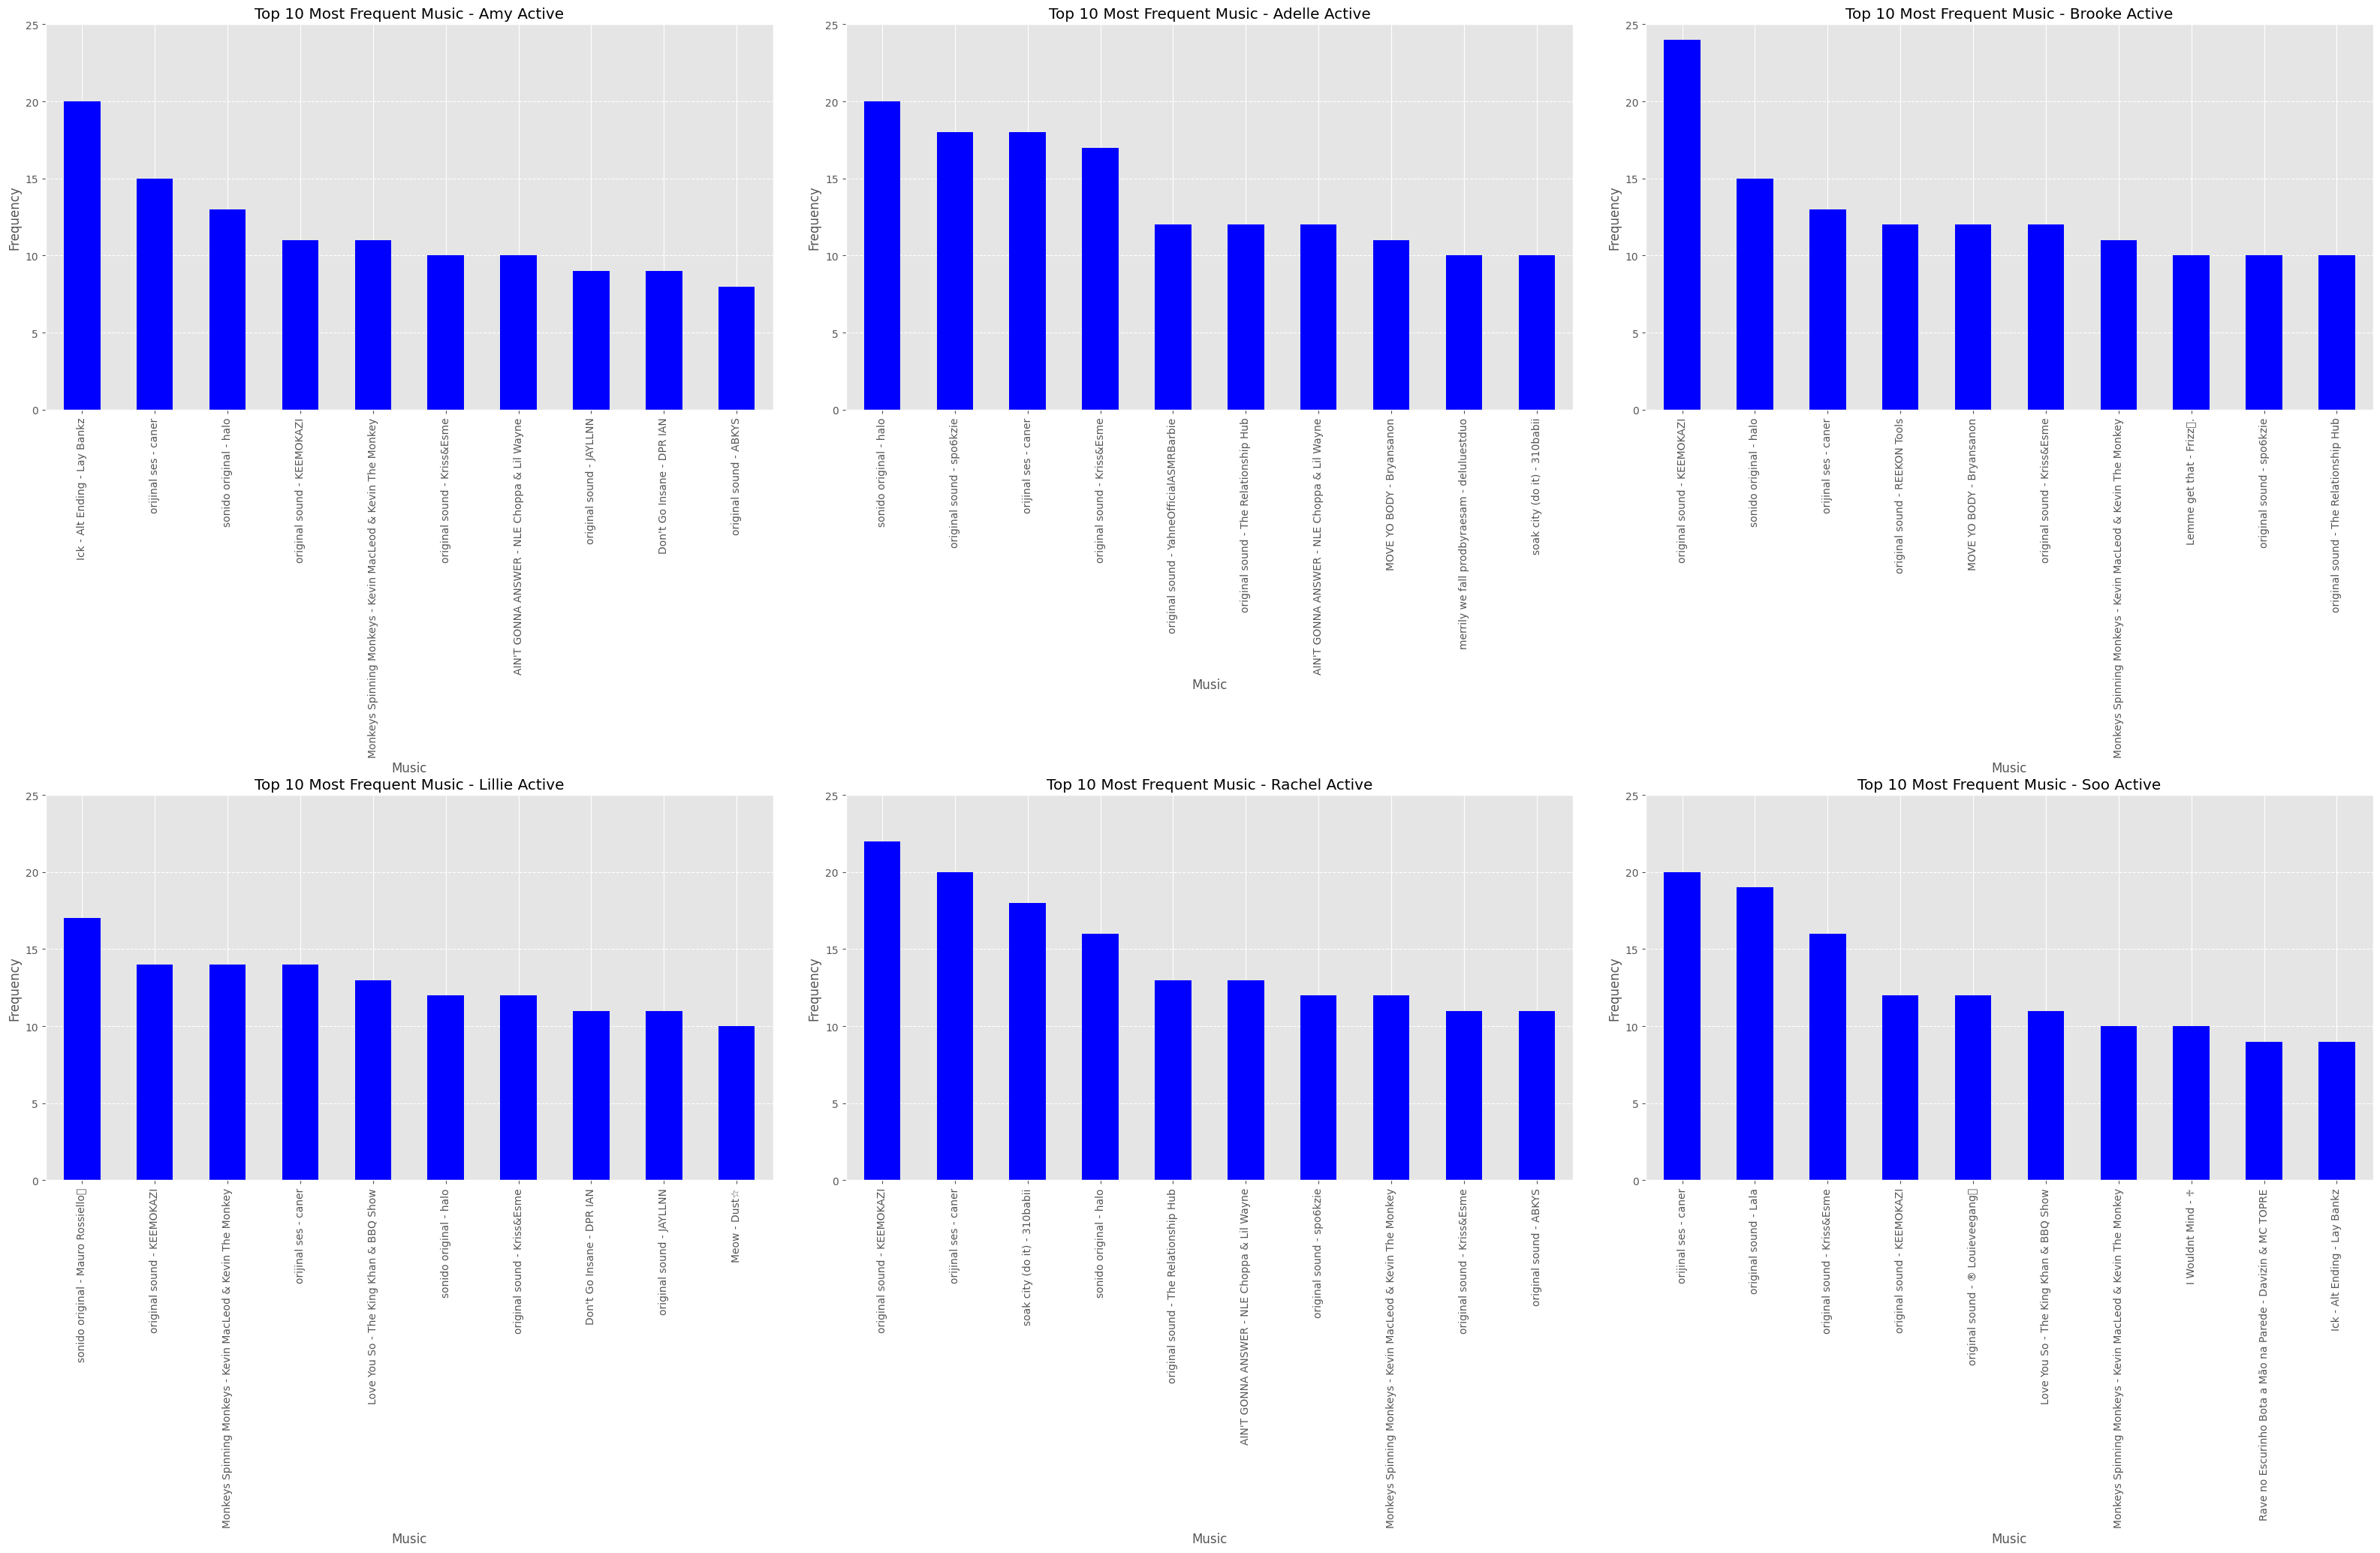

In [31]:
# plots top 10 freq music for active accounts
fig, axes = plt.subplots(2, 3, figsize=(40, 20))
axes = axes.flatten()

for i, (data, title) in enumerate(zip([amy_music_top_active, ad_music_top_active, b_music_top_active, l_music_top_active, r_music_top_active, s_music_top_active],
                                       ['Amy', 'Adelle', 'Brooke', 'Lillie', 'Rachel', 'Soo'])):
    data.plot(kind='bar', color='blue', ax=axes[i])
    axes[i].set_title(f'Top 10 Most Frequent Music - {title} Active')
    axes[i].set_xlabel('Music')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--')
    axes[i].set_ylim(0, 25)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=1)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129708 (\U0001faac) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


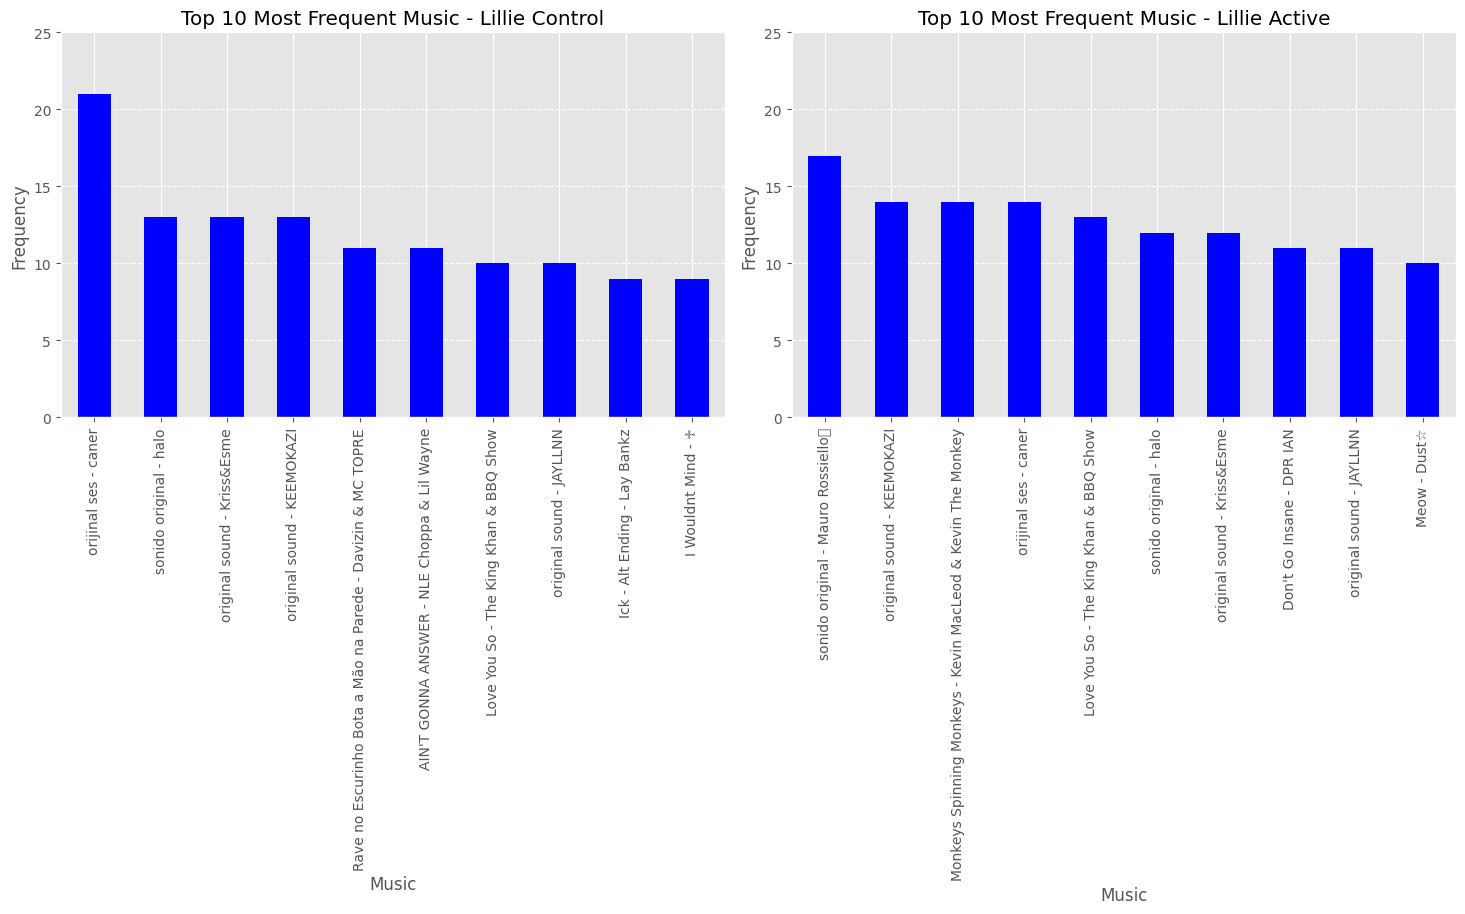

In [32]:
# Lillie's two plots

fig, axes = plt.subplots(1, 2, figsize = (18,5))
axes = axes.flatten()

for i, (data, title) in enumerate(zip([l_music_top, l_music_top_active],
                                       ['Control', 'Active'])):
    data.plot(kind='bar', color='blue', ax=axes[i])
    axes[i].set_title(f'Top 10 Most Frequent Music - Lillie {title}')
    axes[i].set_xlabel('Music')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--')
    axes[i].set_ylim(0, 25)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=1)
plt.show()

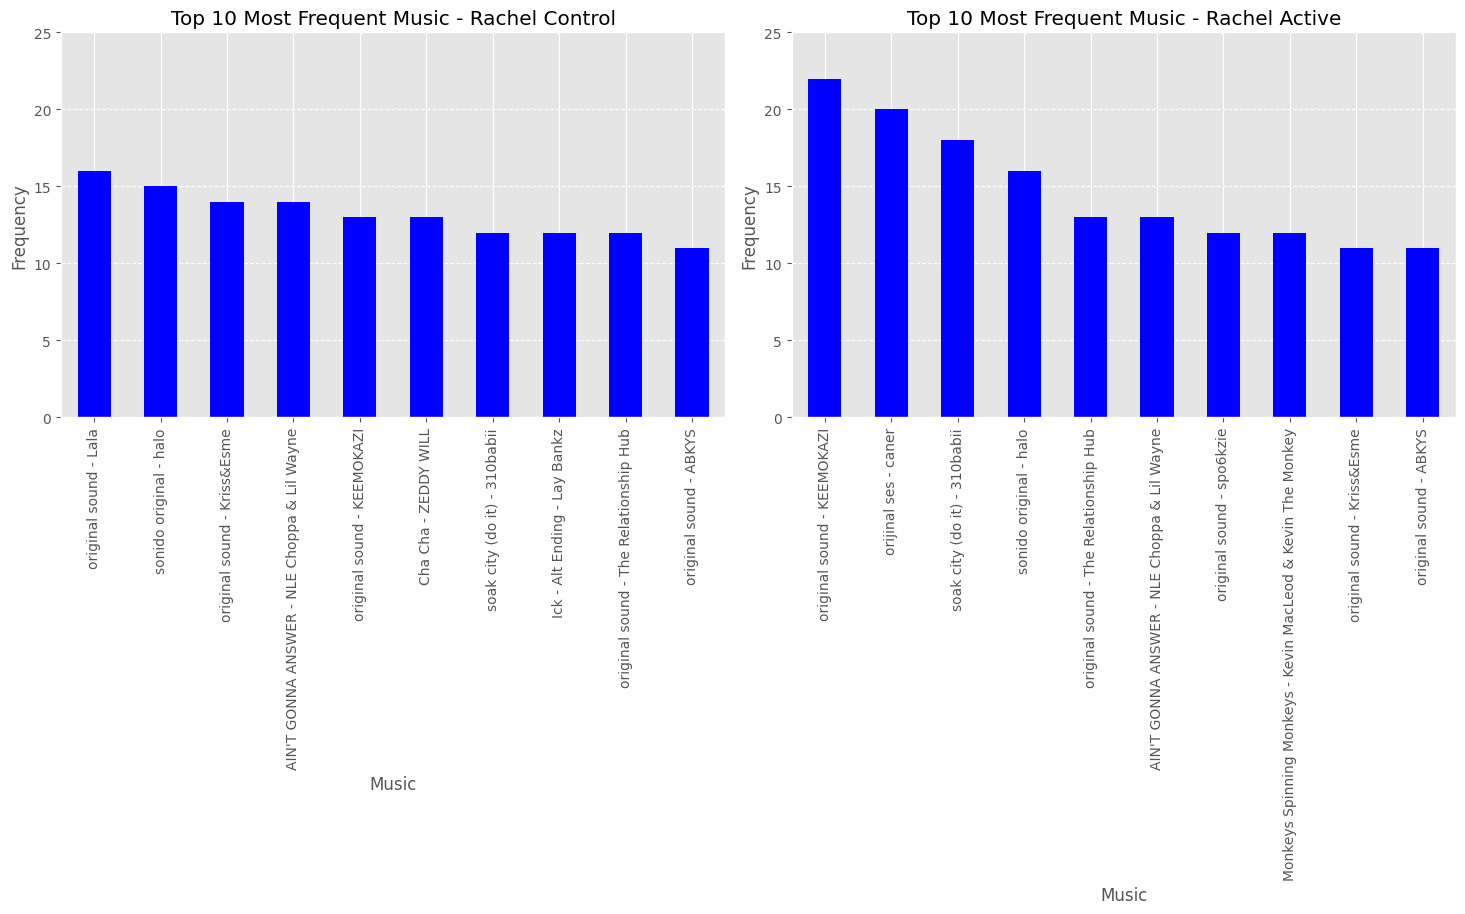

In [33]:
# Rachel's two plots

fig, axes = plt.subplots(1, 2, figsize = (18,5))
axes = axes.flatten()

for i, (data, title) in enumerate(zip([r_music_top, r_music_top_active],
                                       ['Control', 'Active'])):
    data.plot(kind='bar', color='blue', ax=axes[i])
    axes[i].set_title(f'Top 10 Most Frequent Music - Rachel {title}')
    axes[i].set_xlabel('Music')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--')
    axes[i].set_ylim(0, 25)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=1)
plt.show()

In [34]:
# control combined top 10
combined_music = pd.concat([amy_music, ad_music, b_music, l_music, r_music, s_music])

# Remove missing values
combined_music = combined_music[pd.notna(combined_music)]

# Calculate the combined counts
combined_counts = combined_music.value_counts()

# Find the top 10 songs
top_10_songs_control = combined_counts.head(10)
top_10_songs_control

# Find the top 11-20 songs
top_11_to_20_songs_control = combined_counts.iloc[10:20]
top_11_to_20_songs_control

original sound - Lala                                                                53
original sound - spo6kzie                                                            48
Rave no Escurinho Bota a Mão na Parede - Davizin & MC TOPRE                          47
original sound - Jack Doherty                                                        43
Cha Cha - ZEDDY WILL                                                                 42
Dandelions (slowed + reverb) - Ruth B. & sped up + slowed                            41
I Wouldnt Mind - ♱                                                                   40
soak city (do it) - 310babii                                                         37
original sound - ABKYS                                                               37
Automotivo XM, Taka Taka Taka Tá - Dj Brunin XM & Mc Lullu & Mc Erikah & Kinechan    36
Name: music, dtype: int64

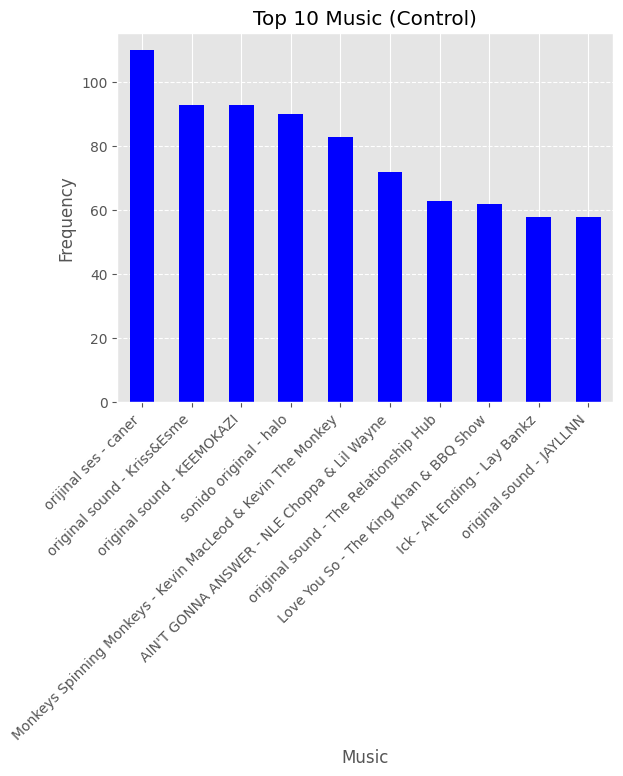

In [35]:
# top 10 control graph

top_10_songs_control.plot(kind='bar', color='blue')
plt.title('Top 10 Music (Control)')
plt.xlabel('Music')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.show()

In [36]:
# active combined top 10
combined_music_active = pd.concat([amy_music_active, ad_music_active, b_music_active, l_music_active, r_music_active, s_music_active])

# Remove missing values
combined_music_active = combined_music_active[pd.notna(combined_music_active)]

# Calculate the combined counts
combined_counts_active = combined_music_active.value_counts()

# Find the top 10 songs
top_10_songs_active = combined_counts_active.head(10)
top_10_songs_active

orijinal ses - caner                                           100
original sound - KEEMOKAZI                                      90
sonido original - halo                                          83
original sound - Kriss&Esme                                     78
Ick - Alt Ending - Lay Bankz                                    67
Monkeys Spinning Monkeys - Kevin MacLeod & Kevin The Monkey     64
AIN'T GONNA ANSWER - NLE Choppa & Lil Wayne                     58
original sound - spo6kzie                                       52
original sound - The Relationship Hub                           52
Love You So - The King Khan & BBQ Show                          51
Name: music, dtype: int64

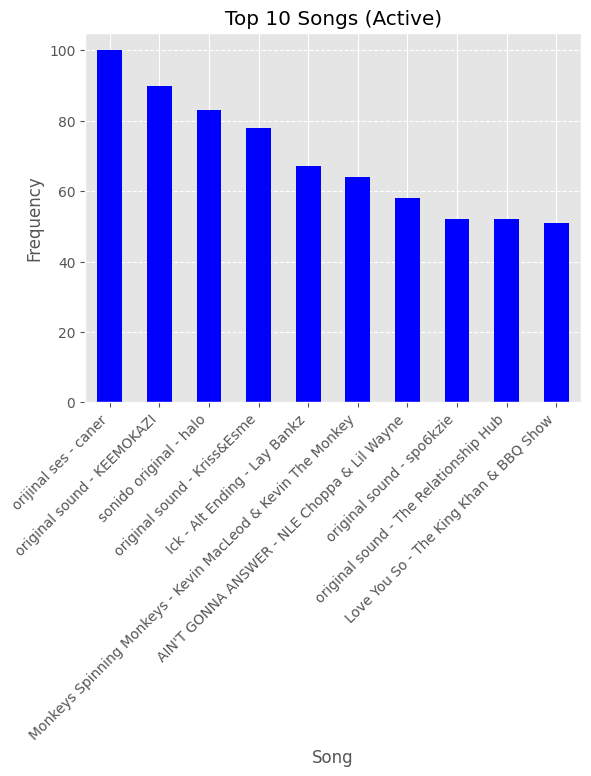

In [37]:
# top 10 active graph

top_10_songs_active.plot(kind='bar', color='blue')
plt.title('Top 10 Songs (Active)')
plt.xlabel('Song')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129396 (\N{FACE WITH UNEVEN EYES AND WAVY MOUTH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


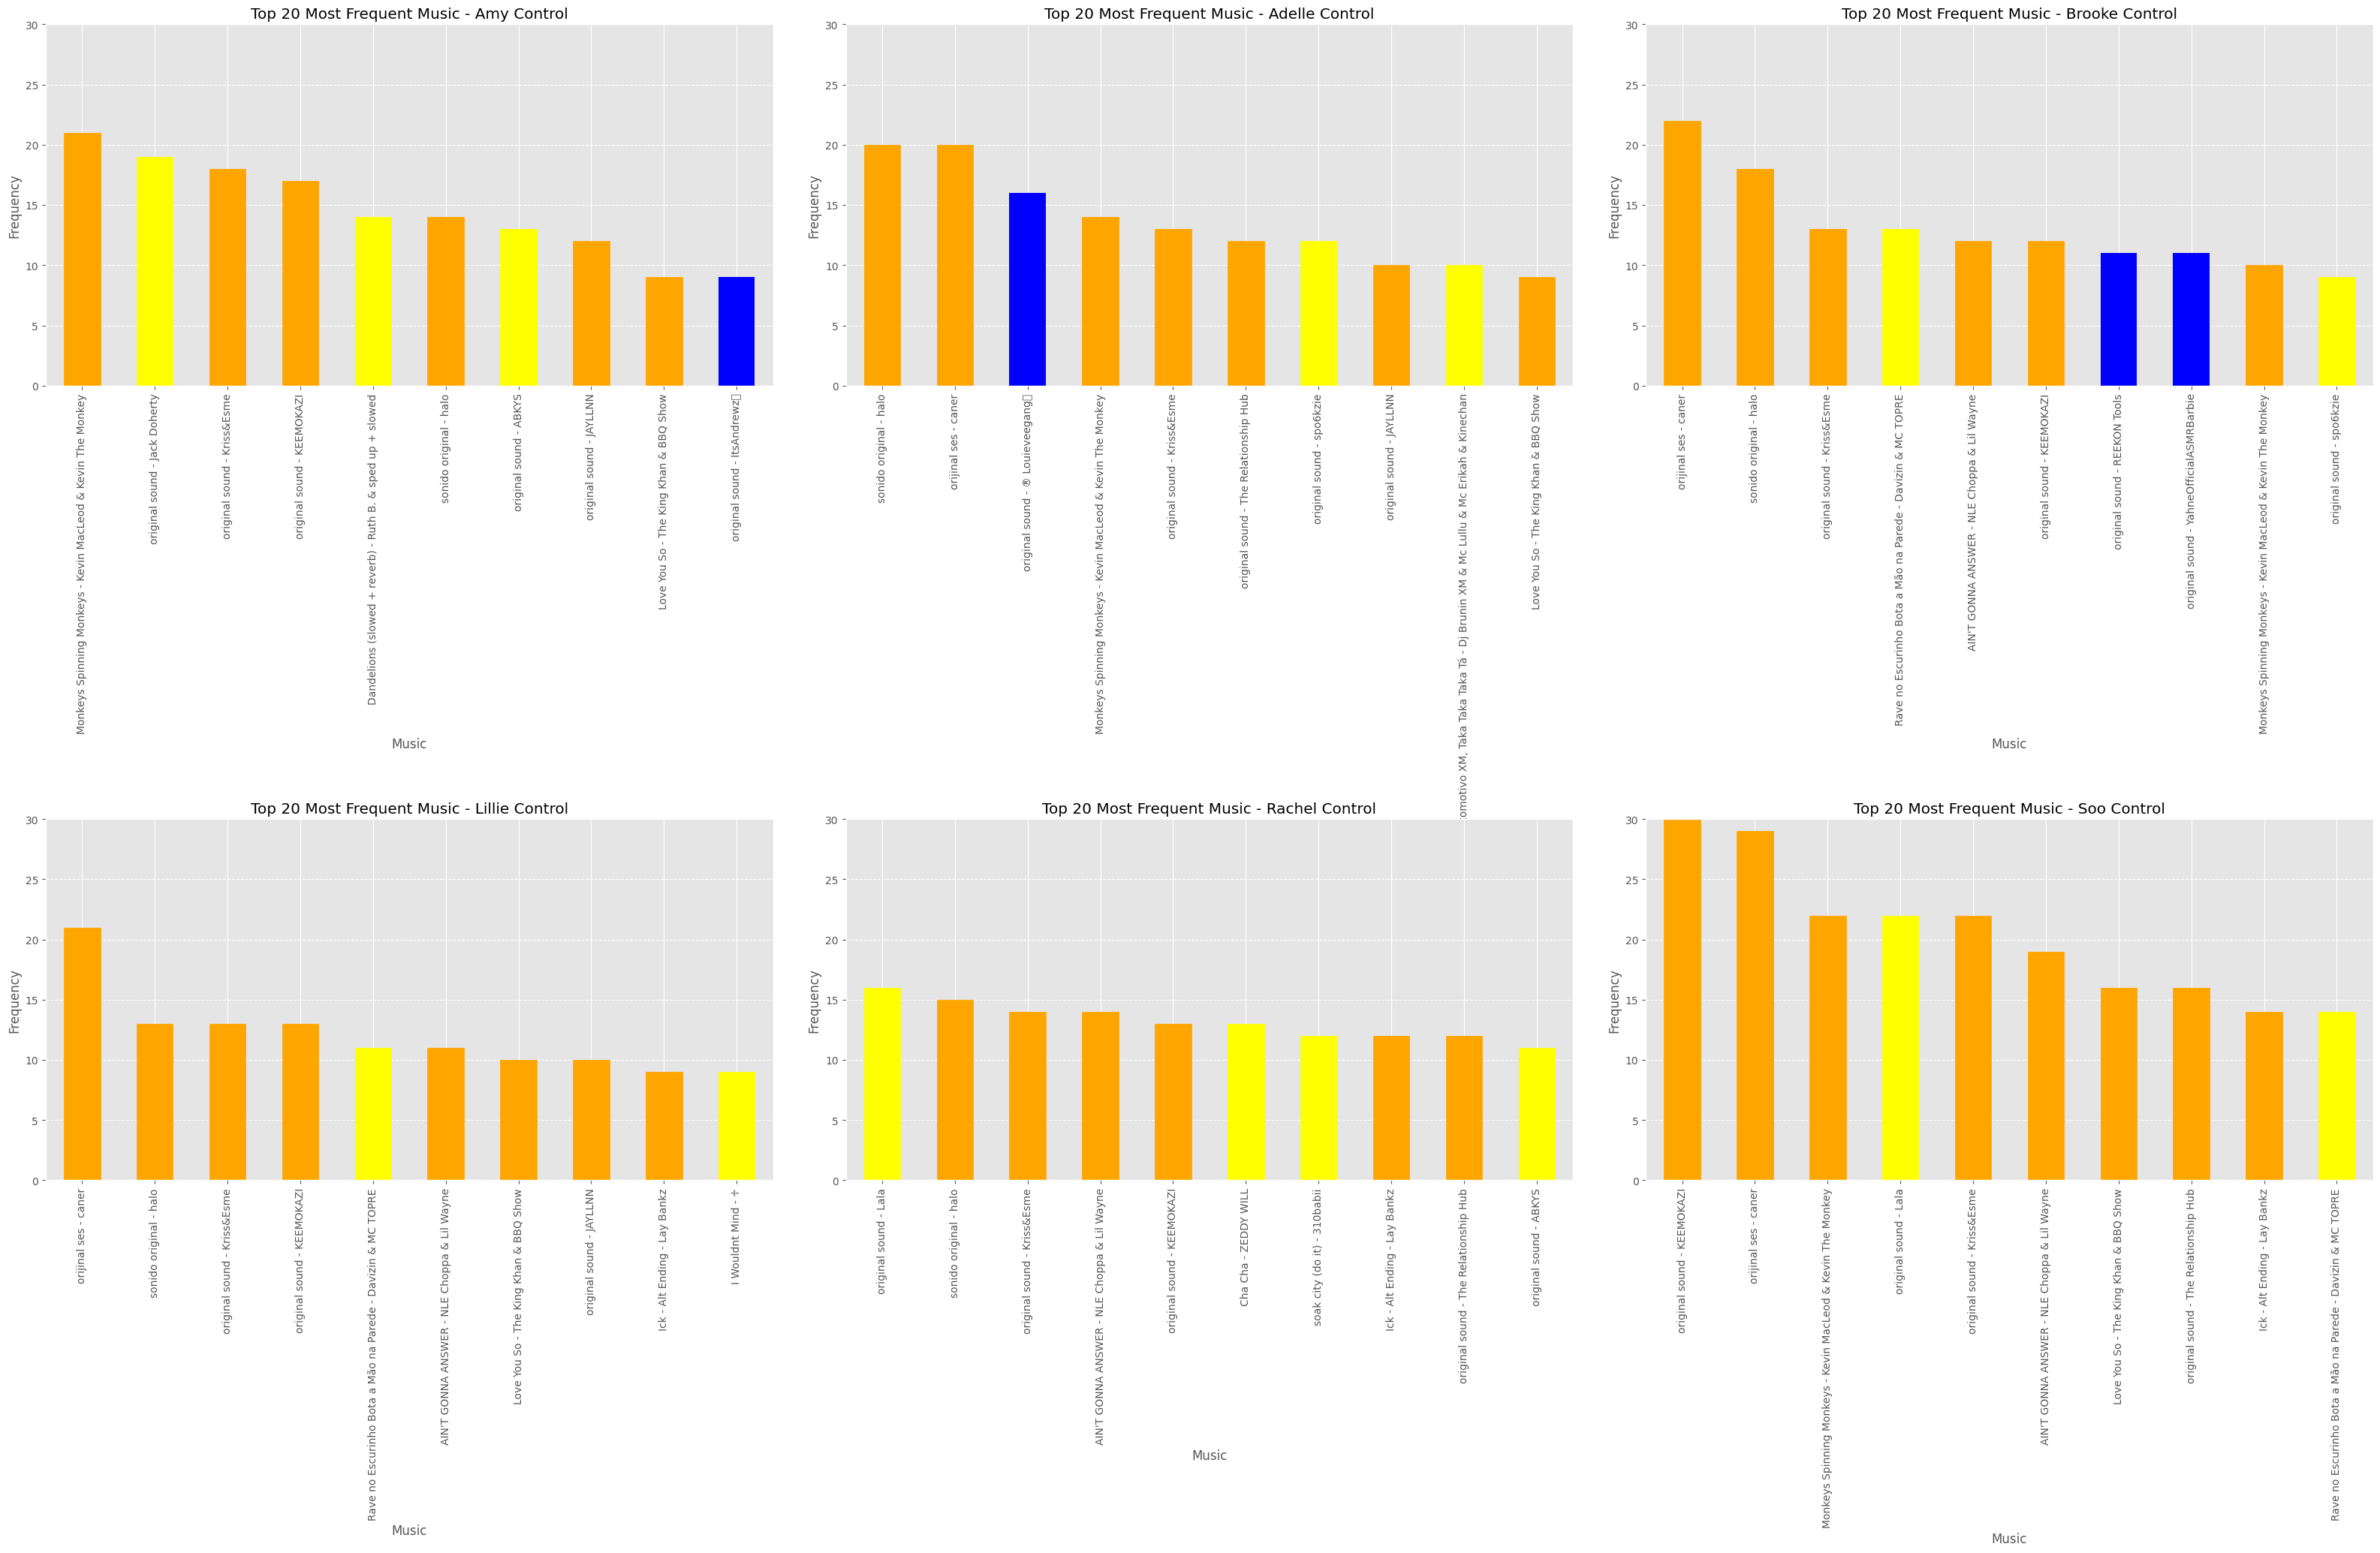

In [38]:
# color bars differently for control
# Define the colors for bars
default_color = 'blue'
highlight_color = 'orange'  # Color for bars that match the top 10 songs
top_20_color = 'yellow'

# Plot the bar graphs
fig, axes = plt.subplots(2, 3, figsize=(40, 20))
axes = axes.flatten()

for i, (data, title) in enumerate(zip([amy_music_top, ad_music_top, b_music_top, l_music_top, r_music_top, s_music_top],
                                       ['Amy', 'Adelle', 'Brooke', 'Lillie', 'Rachel', 'Soo'])):
    bars = data.plot(kind='bar', color=default_color, ax=axes[i])
    axes[i].set_title(f'Top 20 Most Frequent Music - {title} Control')
    axes[i].set_xlabel('Music')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--')
    axes[i].set_ylim(0, 30)

    x_labels = data.index  # Get the x-axis tick labels
    for bar, label in zip(bars.patches, x_labels):
        if label in top_10_songs_control.index:
            bar.set_color(highlight_color)  # Set color to highlight_color if it's a top 10 song
        if label in top_11_to_20_songs_control:
            bar.set_color(top_20_color)




# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=1.2)  # Increase the horizontal and vertical spacing
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128509 (\N{STATUE OF LIBERTY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129708 (\U0001faac) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


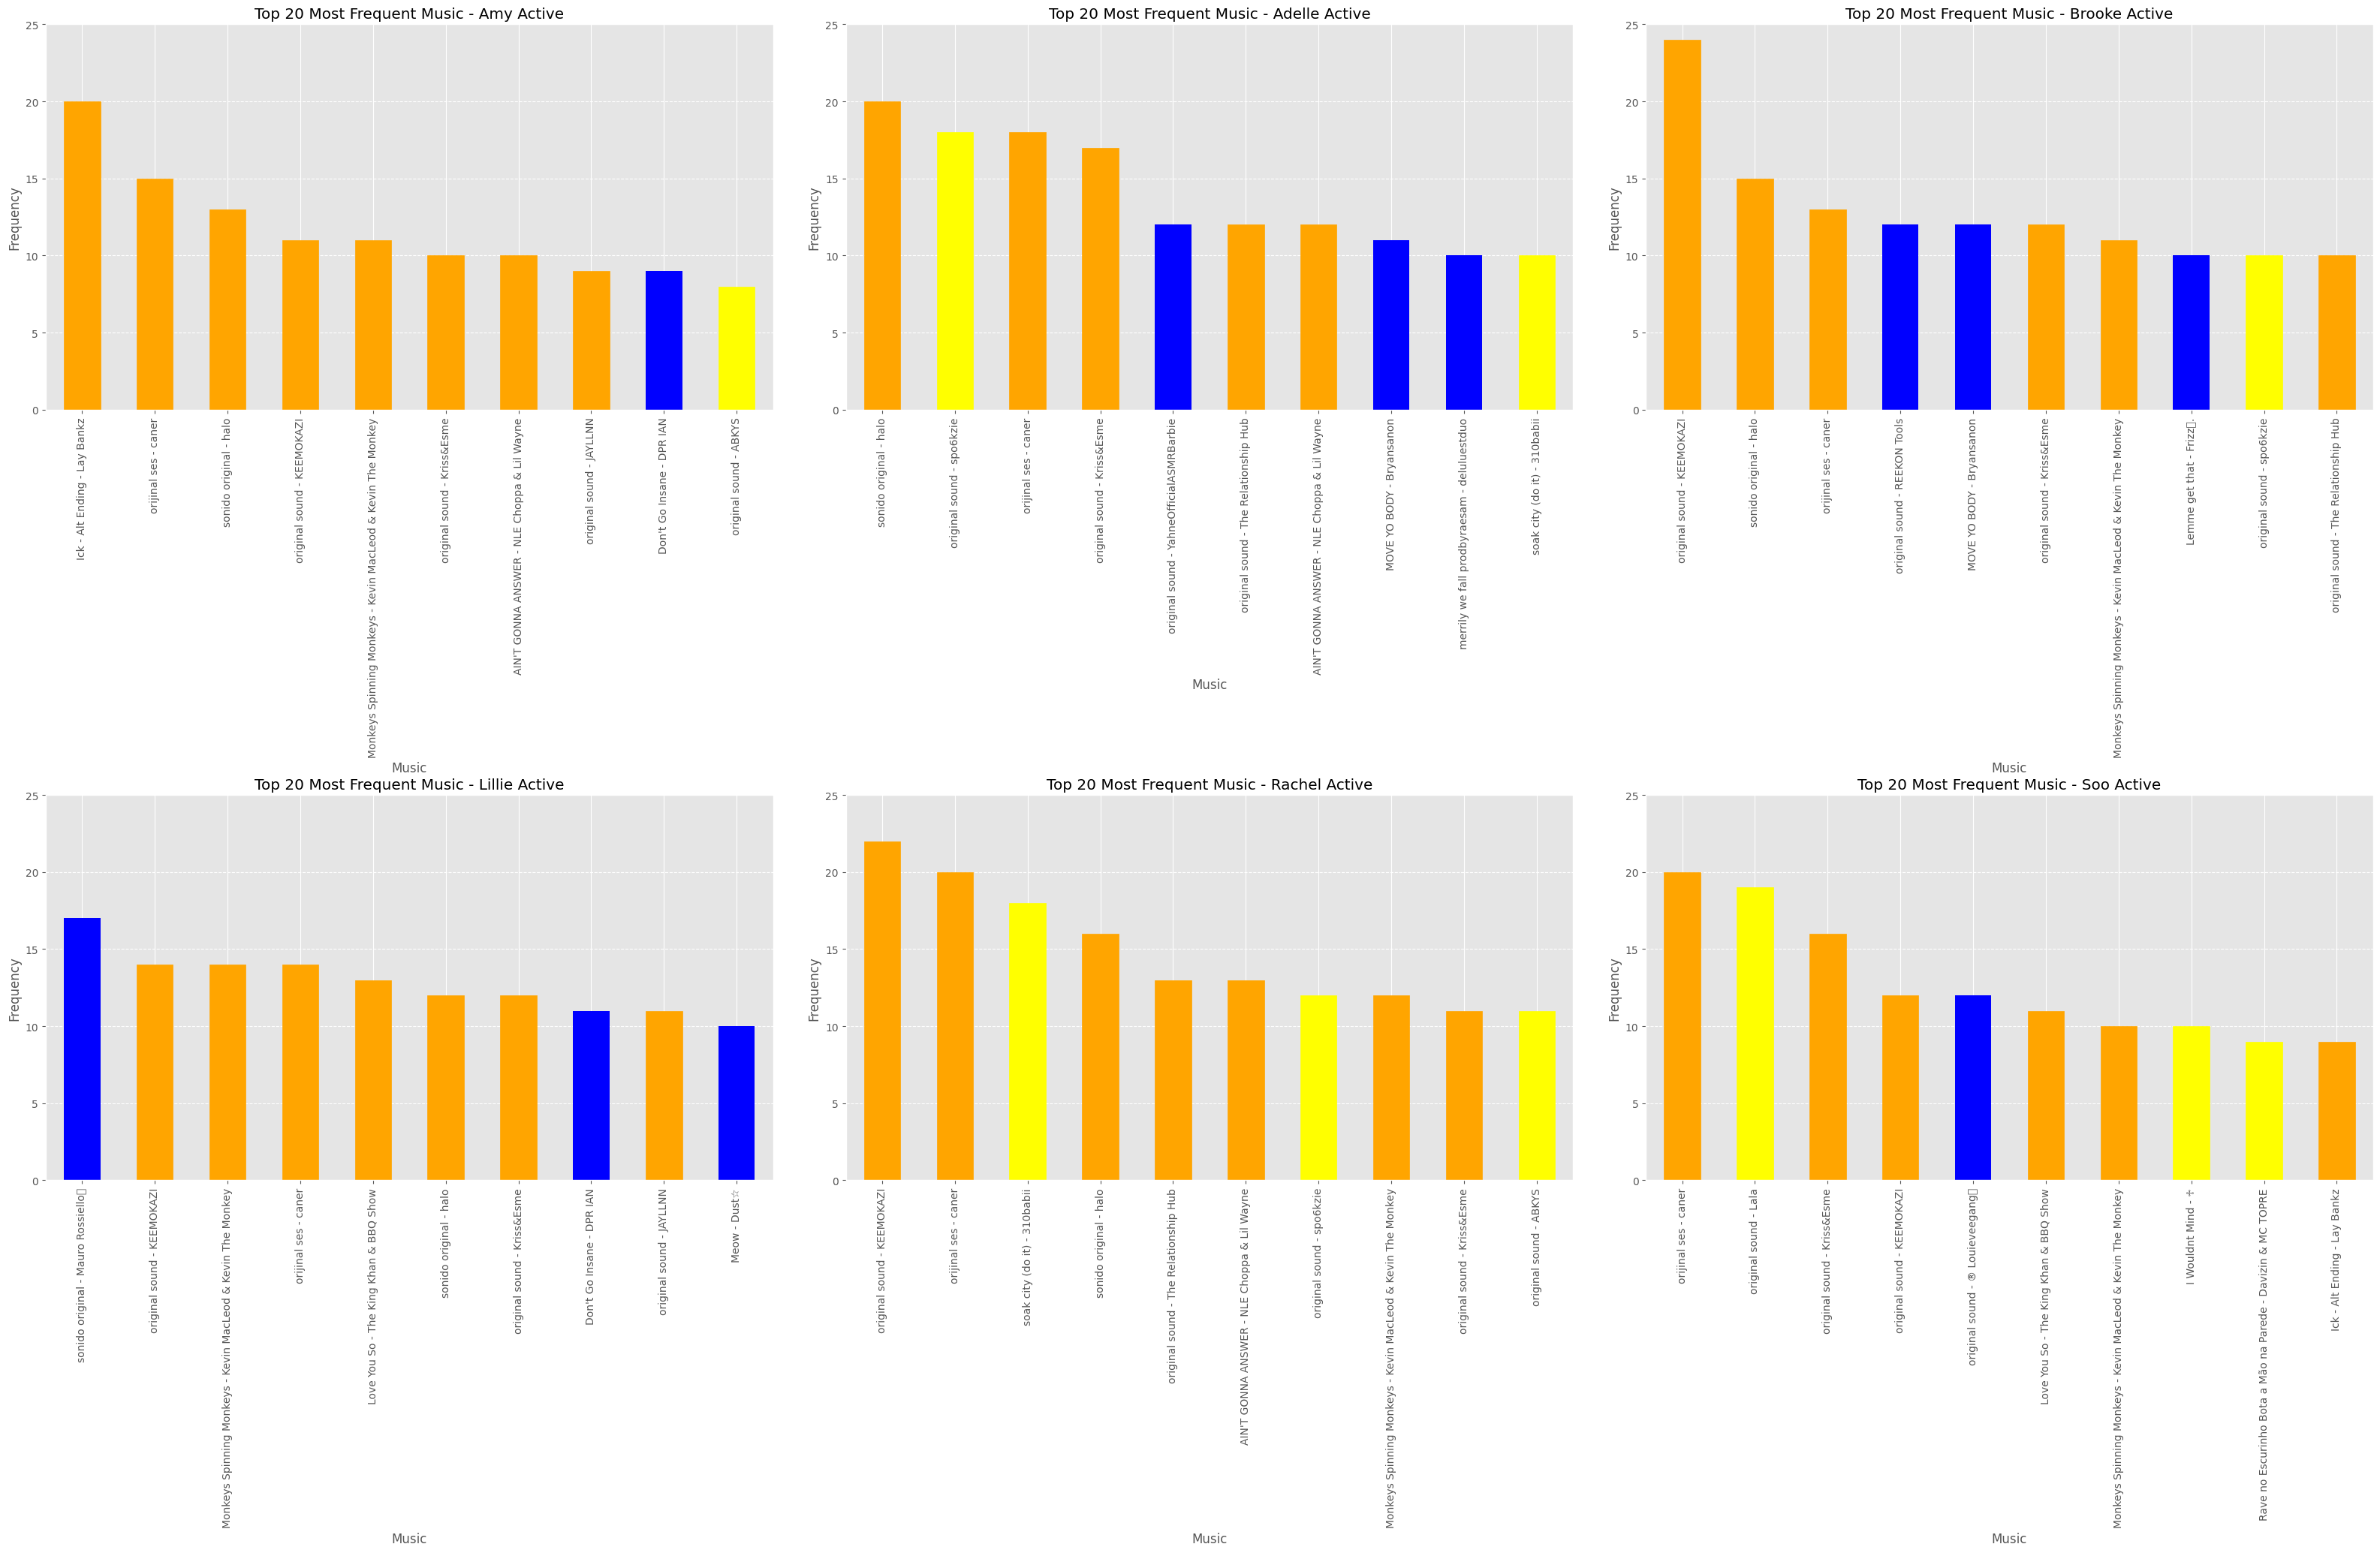

In [39]:
# color the bars differently - active

# Plot the bar graphs
fig, axes = plt.subplots(2, 3, figsize=(40, 20))
axes = axes.flatten()

for i, (data, title) in enumerate(zip([amy_music_top_active, ad_music_top_active, b_music_top_active, l_music_top_active, r_music_top_active, s_music_top_active],
                                       ['Amy', 'Adelle', 'Brooke', 'Lillie', 'Rachel', 'Soo'])):
    bars = data.plot(kind='bar', color=default_color, ax=axes[i])
    axes[i].set_title(f'Top 20 Most Frequent Music - {title} Active')
    axes[i].set_xlabel('Music')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--')
    axes[i].set_ylim(0, 25)

    x_labels = data.index  # Get the x-axis tick labels
    for bar, label in zip(bars.patches, x_labels):
        if label in top_10_songs_control.index:
            bar.set_color(highlight_color)
        if label in top_11_to_20_songs_control:
            bar.set_color(top_20_color)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=1)
plt.show()


## <a name="authfreq"> Author frequency </a>

Histogram of top 5/10 most frequent author shown in the complete feed for control and active accounts. Completed by Brooke.

In [40]:
def count_names(names_list): # Helper function, dictionary counting occurrences of each name
    name_counts = {}  #dictionary to store name counts counts

    for name in names_list:
      if pd.notna(name):
        if name in name_counts:   # If name is already in the dictionary increment count
          name_counts[name] += 1
        else:                     # If name is not in the dictionary add it with count 1
          name_counts[name] = 1

    return name_counts

In [41]:
def dictToDataFrame(data):  #helper function, dictionary to dataframe
  dictionary = count_names(data.loc[:, 'author']) #calls helper to see occurences
  df = pd.DataFrame.from_dict(dictionary, orient='index', columns=['frequency']).reset_index() #makes dataframe dictionary
  df.columns = ['names', 'frequency']
  df = df.sort_values(by='frequency', ascending=False)
  df = df.reset_index(drop=True)
  return df

In [42]:
#storing databases for data visualisation of 6 figures
amycontrol = dictToDataFrame(amy_control)
amycontrol = amycontrol.head(10)

adellecontrol = dictToDataFrame(adelle_control)
adellecontrol  = adellecontrol.head(10)

brookecontrol = dictToDataFrame(brooke_control)
brookecontrol = brookecontrol.head(10)

lilliecontrol = dictToDataFrame(lillie_control)
lilliecontrol = lilliecontrol.head(10)

rachelcontrol = dictToDataFrame(rachel_control)
rachelcontrol = rachelcontrol.head(10)

soocontrol = dictToDataFrame(soo_control)
soocontrol = soocontrol.head(10)

In [43]:
amyactive = dictToDataFrame(amy_active)
amyactive = amyactive.head(10)

adelleactive = dictToDataFrame(adelle_active)
adelleactive = adelleactive.head(10)

brookeactive = dictToDataFrame(brooke_active)
brookeactive = brookeactive.head(10)

lillieactive = dictToDataFrame(lillie_active)
lillieactive = lillieactive.head(10)

rachelactive = dictToDataFrame(rachel_active)
rachelactive = rachelactive.head(10)

sooactive = dictToDataFrame(soo_active)
sooactive = sooactive.head(10)
#display(amyactive)

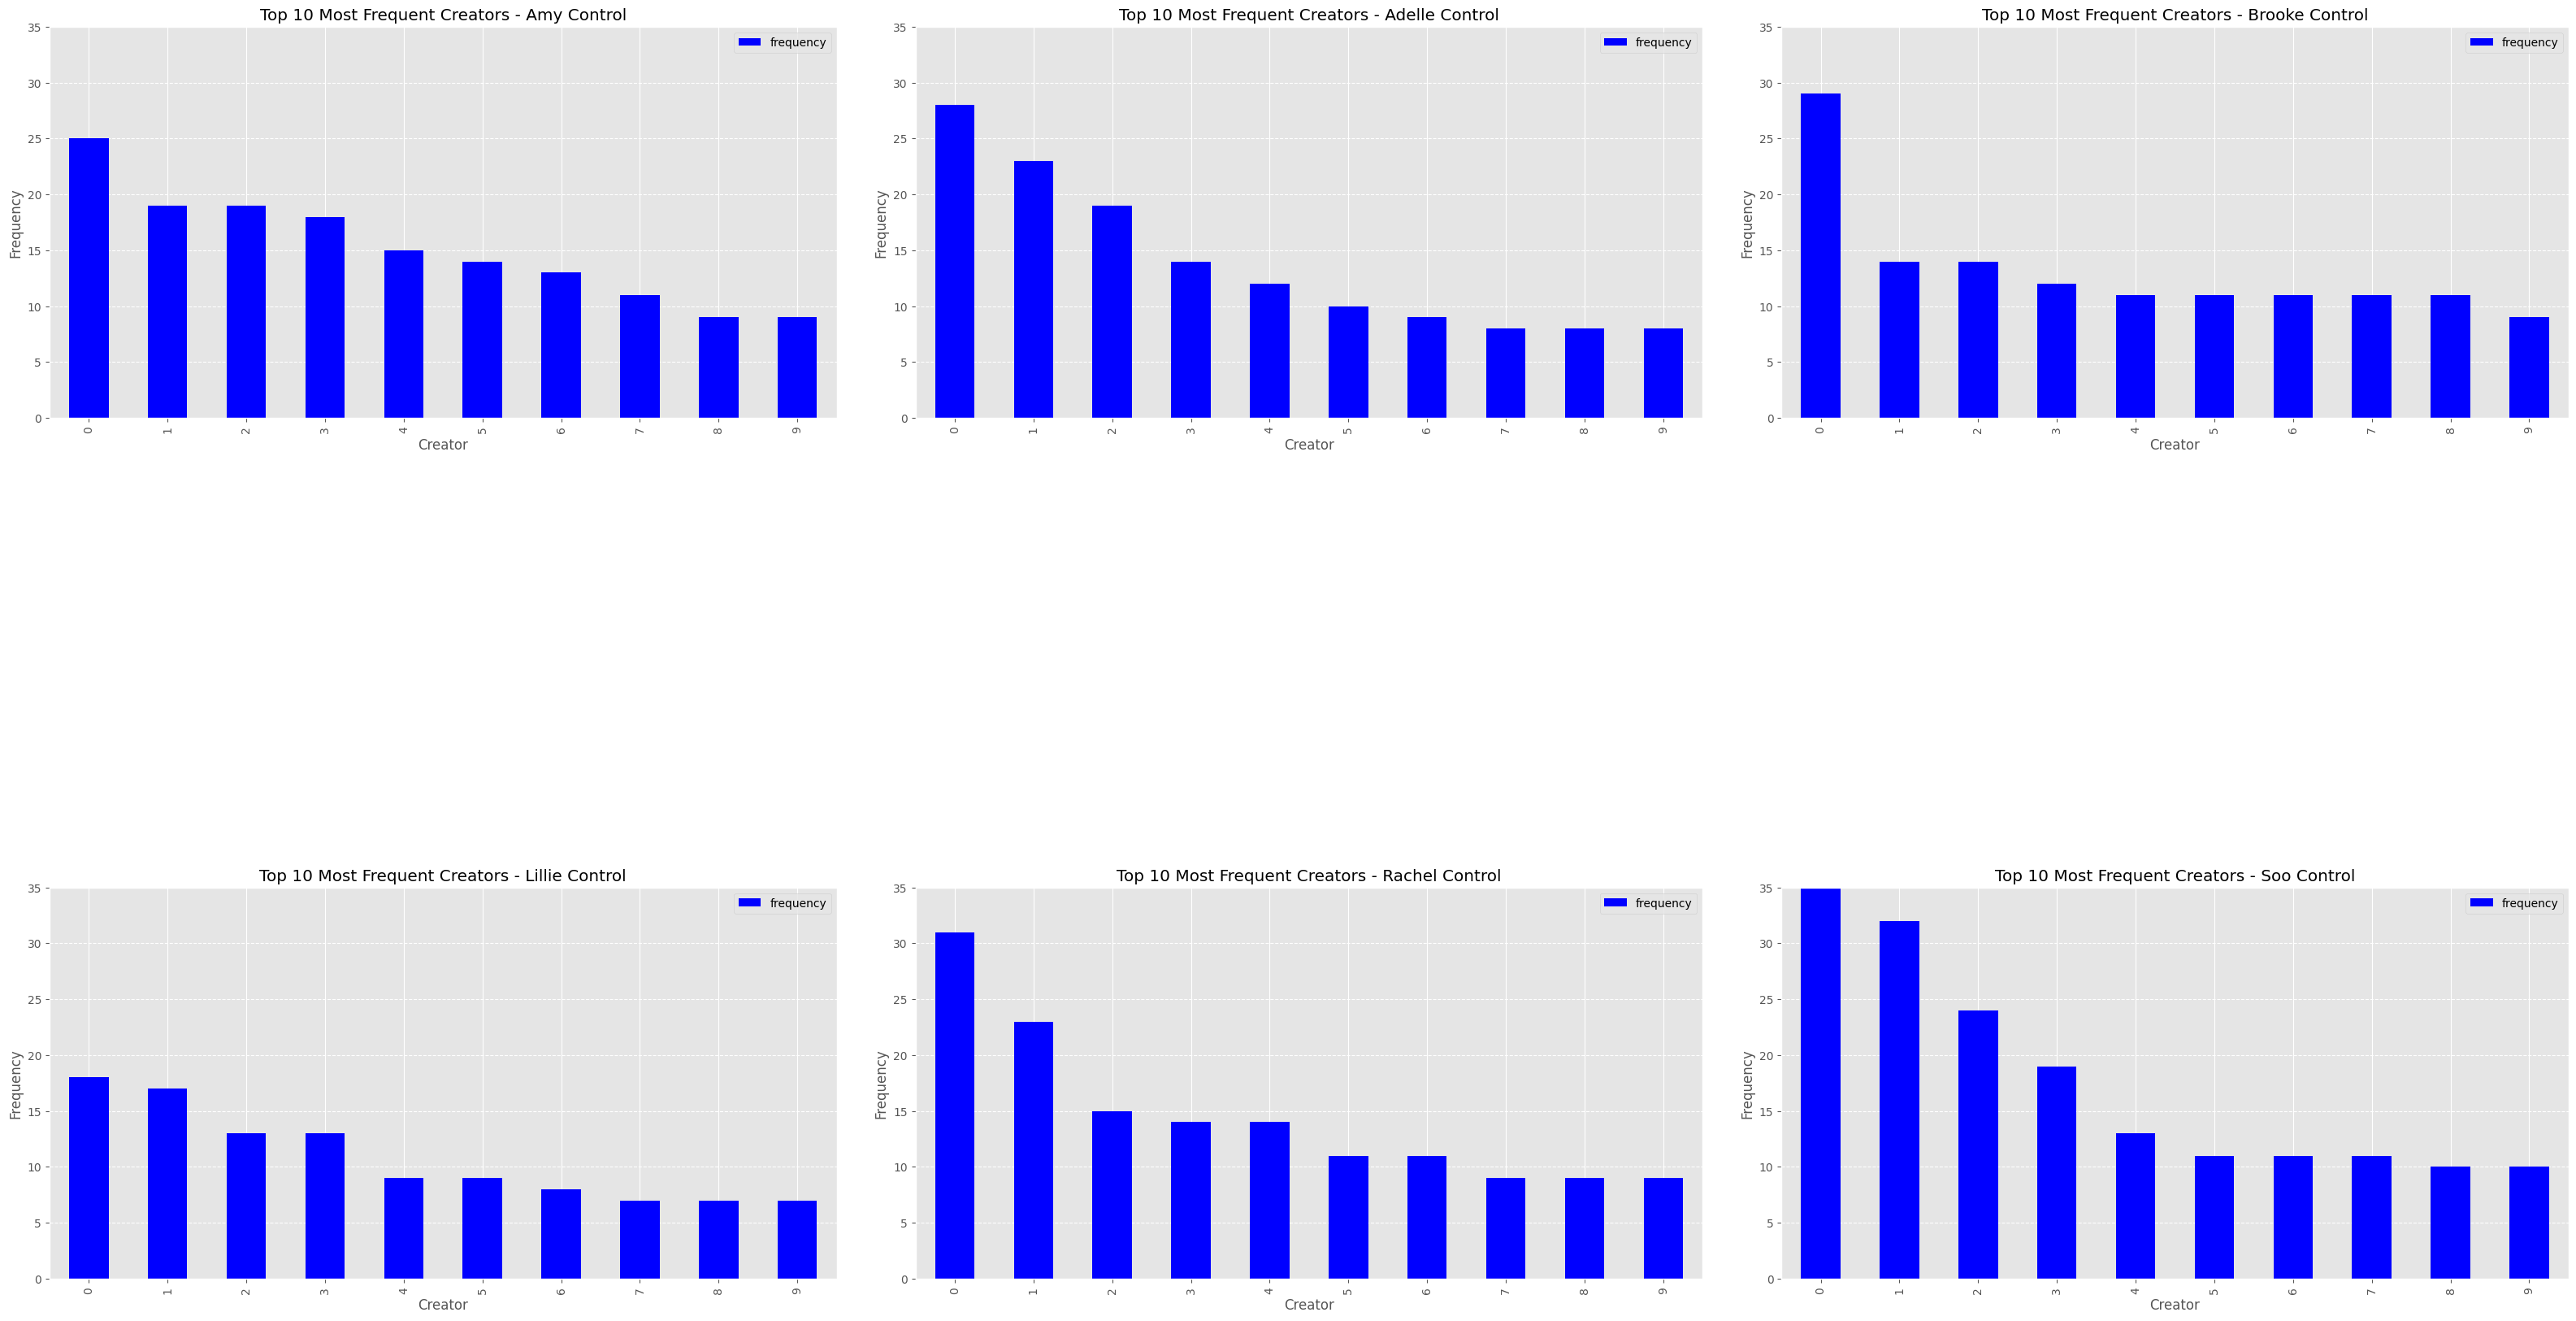

In [44]:
#making the six control graphs together
fig, axes = plt.subplots(2, 3, figsize=(40, 20))
axes = axes.flatten()

for i, (data, title) in enumerate(zip([amycontrol, adellecontrol,  brookecontrol, lilliecontrol, rachelcontrol, soocontrol],
                                       ['Amy', 'Adelle', 'Brooke', 'Lillie', 'Rachel', 'Soo'])):
    data.plot(kind='bar', color='blue', ax=axes[i])
    axes[i].set_title(f'Top 10 Most Frequent Creators - {title} Control')
    axes[i].set_xlabel('Creator')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--')
    axes[i].set_ylim(0, 35)


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=1.2)  # Increase the horizontal and vertical spacing
plt.show()

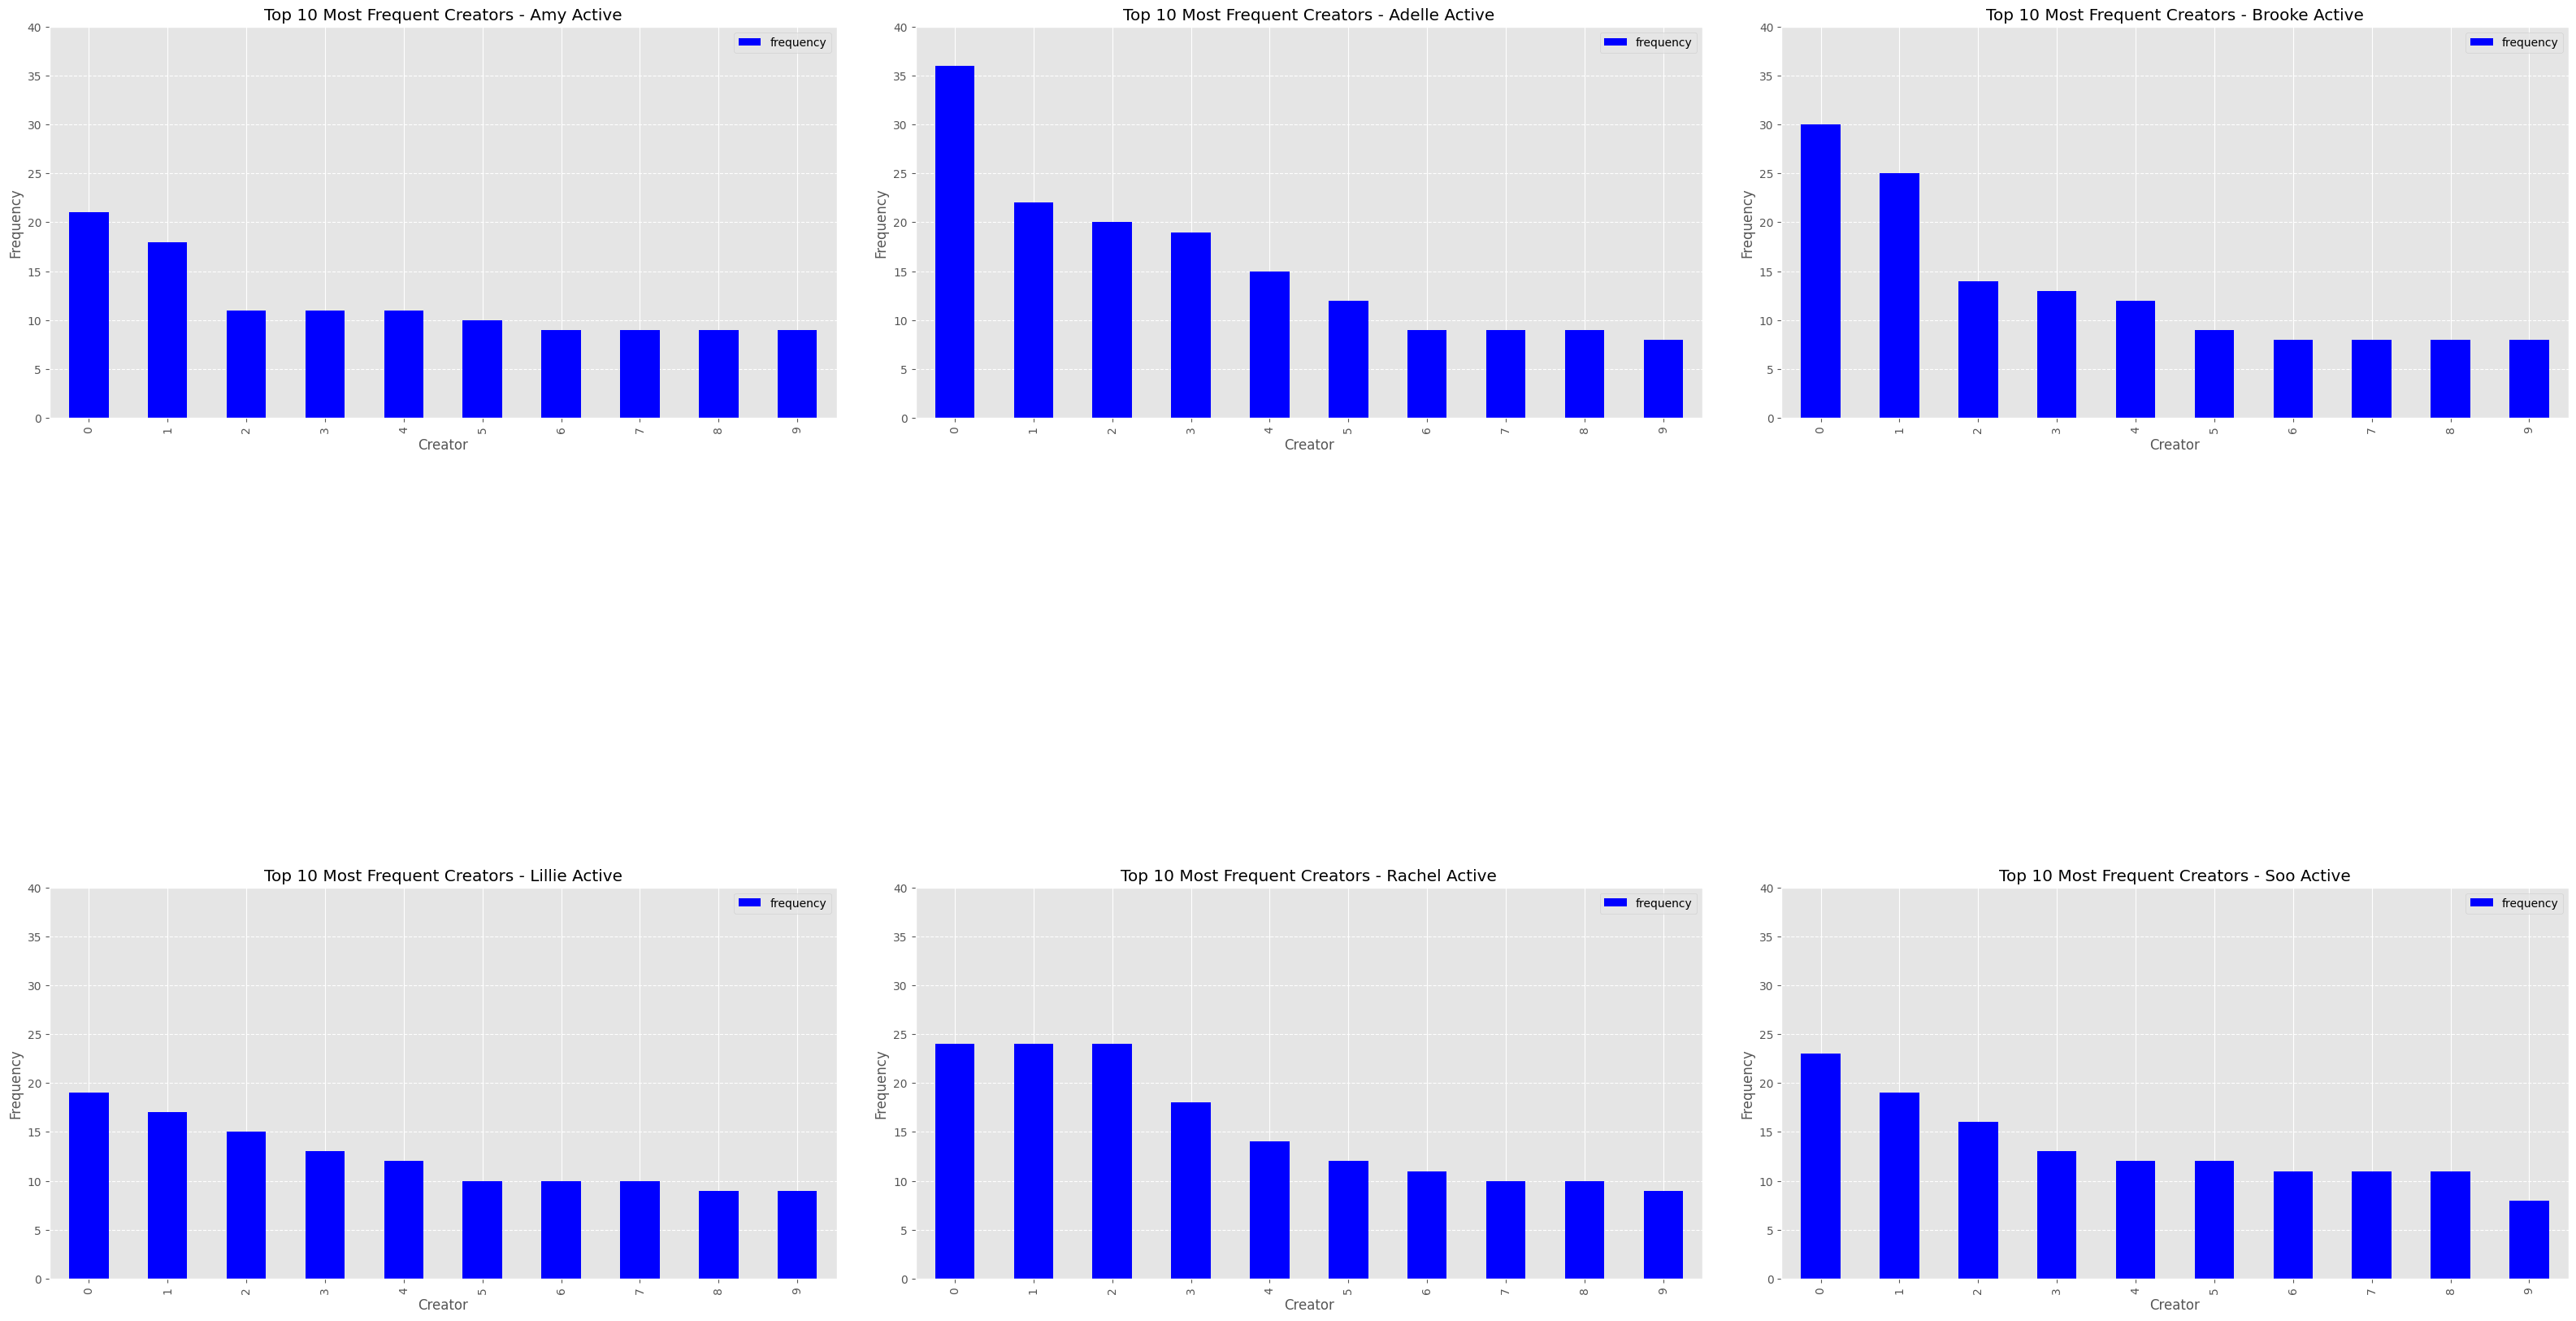

In [45]:
#making the six control graphs together
fig, axes = plt.subplots(2, 3, figsize=(40, 20))
axes = axes.flatten()

for i, (data, title) in enumerate(zip([amyactive, adelleactive,  brookeactive, lillieactive, rachelactive, sooactive],
                                       ['Amy', 'Adelle', 'Brooke', 'Lillie', 'Rachel', 'Soo'])):
    data.plot(kind='bar', color='blue', ax=axes[i])
    axes[i].set_title(f'Top 10 Most Frequent Creators - {title} Active')
    axes[i].set_xlabel('Creator')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--')
    axes[i].set_ylim(0, 40)


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=1.2)  # Increase the horizontal and vertical spacing
plt.show()

In [46]:
# Making an individual graph from a database
def makeGraph(data, member, persona, actcont, bars, columns):
  dataframe = dictToDataFrame(data)
  names = dataframe.loc[:, 'names'][:bars]
  freq = dataframe.loc[:, 'frequency'][:columns] #come back

  # when plotting bars, the x-axis doesn't have numerical values, we need to generate them
  # this is why we use range(len(movies)) in the line below
  plt.bar(range(len(names)), freq, color = 'blue')
  plt.xlabel("Creators")
  plt.ylabel("Frequency")
  plt.title("Top 20 Most Frequent Creators (" + persona + ") - " + member + " " + actcont)

  # label x-axis with movie names by providing indices 0, 1, 2, etc. and labels for each tick
  plt.xticks(range(len(names)), names, rotation=45, ha='right')
  return plt
  plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

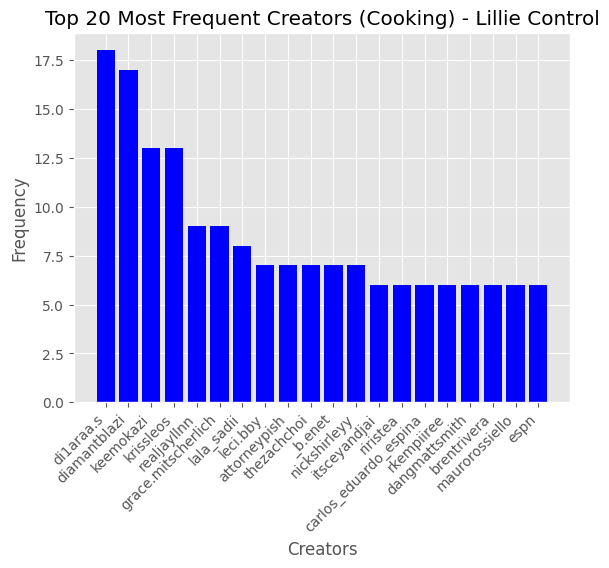

In [47]:
# graphs for active and control 1 person

num = 20 #number of bars shown
#makeGraph(amy_active, 'Amy', 'Gaming', 'Active', num, num)
#makeGraph(amy_control, 'Amy', 'Gaming', 'Control', num, num)

#makeGraph(brooke_active, 'Brooke', 'Art', 'Active', num, num)
##makeGraph(brooke_control, 'Brooke', 'Art', 'Control', num, num)

#makeGraph(adelle_active, 'Adelle', 'Sports', 'Active', num, num)
#makeGraph(adelle_control, 'Adelle', 'Sports', 'Control', num, num)

makeGraph(lillie_active, 'Lillie', 'Cooking', 'Active', num, num)
makeGraph(lillie_control, 'Lillie', 'Cooking', 'Control', num, num)

#makeGraph(soo_active, 'Soo', 'Active', 'Makeup', num, num,)
#makeGraph(soo_control, 'Soo', 'Control', 'Makeup', num, num)

#makeGraph(rachel_active, 'Rachel', 'Active', 'K-Pop', num, num)
#makeGraph(rachel_control, 'Rachel', 'Control', 'K-Pop', num, num)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

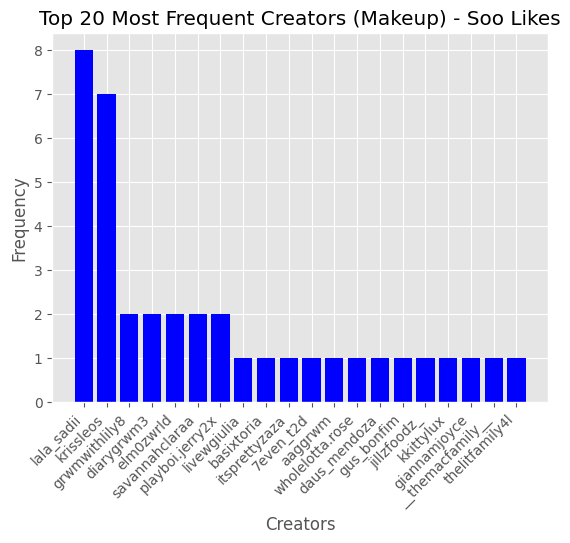

In [48]:
# top creators for liked videos one person

num = 20 #number of bars shown
#makeGraph(ah_likes, 'Amy', 'Gaming', 'Likes', num, num)
#makeGraph(bb_likes, 'Brooke', 'Art', 'Likes', num, num)
#makeGraph(aw_likes, 'Adelle', 'Sports', 'Likes', num, num)

#makeGraph(lg_likes, 'Lillie', 'Cooking', 'Likes', num, num)
makeGraph(sl_likes, 'Soo', 'Makeup', 'Likes', num, num,)
##makeGraph(rx_likes, 'Rachel', 'K-Pop', 'Likes', num, num)

## <a name="interactions"> Number of interactions over time </a>

The number of likes, shares, comments, and saves was scraped from videos on the feed and averaged across all 6 personas for each condition over time. Completed by Lillie and Adelle.

In [49]:
# Concatenate all active data into one dataframe
def makeActiveDF(col):
  s1 = amy_active[col].reset_index(drop=True)
  s2 = lillie_active[col].reset_index(drop=True)
  s3 = rachel_active[col].reset_index(drop=True)
  s4 = soo_active[col].reset_index(drop=True)
  s5 = adelle_active[col].reset_index(drop=True)
  s6 = brooke_active[col].reset_index(drop=True)

  return pd.concat([s1,s2,s3,s4,s5,s6],axis=1,ignore_index=True)

# Concatenate all control data into one dataframe
def makeControlDF(col):
  s1 = amy_control[col].reset_index(drop=True)
  s2 = lillie_control[col].reset_index(drop=True)
  s3 = rachel_control[col].reset_index(drop=True)
  s4 = soo_control[col].reset_index(drop=True)
  s5 = adelle_control[col].reset_index(drop=True)
  s6 = brooke_control[col].reset_index(drop=True)

  return pd.concat([s1,s2,s3,s4,s5,s6],axis=1,ignore_index=True)

# Remove extreme outliers in data
def removeOutliers(df):
  q = df.quantile(0.99999999999999999999999999999999999999999999999999999999999)
  return df[(df<q)]

# Create active dataframes for each type of post interaction, remove outliers
saves_active = removeOutliers(makeActiveDF('saves'))
comments_active = removeOutliers(makeActiveDF('comments'))
shares_active = removeOutliers(makeActiveDF('shares'))
likes_active = removeOutliers(makeActiveDF('likes'))

# Take the mean of post interactions across all runs of active users
saves_active = saves_active.mean(axis=1)
comments_active = comments_active.mean(axis=1)
shares_active = shares_active.mean(axis=1)
likes_active = likes_active.mean(axis=1)

# Create control dataframes for each type of post interaction, remove outliers
saves_control = removeOutliers(makeControlDF('saves'))
comments_control = removeOutliers(makeControlDF('comments'))
shares_control = removeOutliers(makeControlDF('shares'))
likes_control = removeOutliers(makeControlDF('likes'))

# Take mean of post interactions across all runs of control users
saves_control = saves_control.mean(axis=1)
comments_control = comments_control.mean(axis=1)
shares_control = shares_control.mean(axis=1)
likes_control = likes_control.mean(axis=1)


<Figure size 640x480 with 0 Axes>

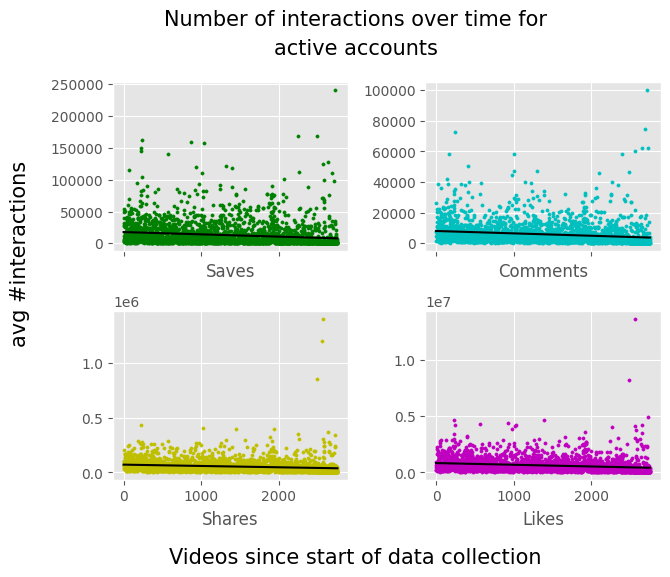

In [50]:
# Create plot figure of 2x2 subplots for active users
factive = plt.figure()
factive, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = False)

# Plot saves in top left, with x being the index and y being avg number of saves
x_saves = saves_active.index
y_saves = saves_active
coefficients_saves = np.polyfit(x_saves, y_saves, 1)
axes[0][0].scatter(x_saves, y_saves, color = "g",s=5)
axes[0][0].plot(x_saves, np.polyval(coefficients_saves, x_saves), color='black', label='Regression Line')
axes[0][0].set_xlabel('Saves', labelpad = 5)

# Plot comments in top right, with x being the index and y being avg number of comments
x_comments = comments_active.index
y_comments = comments_active
coefficients_comments = np.polyfit(x_comments, y_comments, 1)
axes[0][1].scatter(x_comments, y_comments, color = "c",s=5)
axes[0][1].plot(x_comments, np.polyval(coefficients_comments, x_comments), color='black', label='Regression Line')
axes[0][1].set_xlabel('Comments', labelpad = 5)

# Plot shares in bottom left, with x being the index and y being avg number of shares
x_shares = shares_active.index
y_shares = shares_active
coefficients_shares = np.polyfit(x_shares, y_shares, 1)
axes[1][0].scatter(shares_active.index, shares_active, color = "y",s=5)
axes[1][0].plot(x_shares, np.polyval(coefficients_shares, x_shares), color='black', label='Regression Line')
axes[1][0].set_xlabel('Shares', labelpad = 5)

# Plot likes in bottom right, with x being the index and y being avg number of likes
x_likes = likes_active.index
y_likes = likes_active
coefficients_likes = np.polyfit(x_likes, y_likes, 1)
axes[1][1].scatter(x_likes, y_likes, color = "m",s=5)
axes[1][1].plot(x_likes, np.polyval(coefficients_likes, x_likes), color='black', label='Regression Line')
axes[1][1].set_xlabel('Likes', labelpad = 5)

# Adding labels
factive.tight_layout()
factive.text(0.5, 1.08, 'Number of interactions over time for',
              ha='center', size=15)
factive.text(0.5, 1.02, 'active accounts',
              ha='center', size=15)
factive.text(0.5, -0.04, 'Videos since start of data collection', ha='center',
              size=15)
factive.text(-0.04, 0.42, 'avg #interactions', size=15).set_rotation(90)

plt.show()

<Figure size 640x480 with 0 Axes>

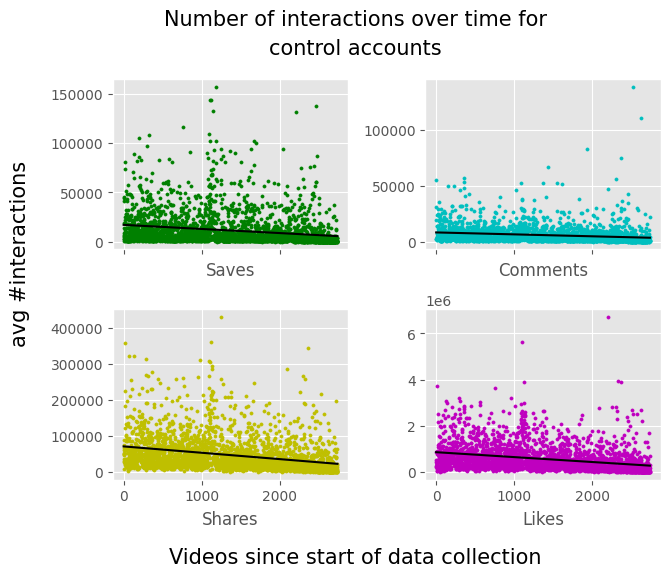

In [51]:
# Create plot figure of 2x2 subplots for control users
fcontrol = plt.figure()
fcontrol, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = False)

# Plot saves in top left, with x being the index and y being avg number of saves
x_saves = saves_control.index
y_saves = saves_control
coefficients_saves = np.polyfit(x_saves, y_saves, 1)
axes[0][0].scatter(x_saves, y_saves, color = "g",s=5)
axes[0][0].plot(x_saves, np.polyval(coefficients_saves, x_saves), color='black', label='Regression Line')
axes[0][0].set_xlabel('Saves', labelpad = 5)

# Plot comments in top right, with x being the index and y being avg number of comments
x_comments = comments_control.index
y_comments = comments_control
coefficients_comments = np.polyfit(x_comments, y_comments, 1)
axes[0][1].scatter(x_comments, y_comments, color = "c",s=5)
axes[0][1].plot(x_comments, np.polyval(coefficients_comments, x_comments), color='black', label='Regression Line')
axes[0][1].set_xlabel('Comments', labelpad = 5)

# Plot shares in bottom left, with x being the index and y being avg number of shares
x_shares = shares_control.index
y_shares = shares_control
coefficients_shares = np.polyfit(x_shares, y_shares, 1)
axes[1][0].scatter(x_shares, y_shares, color = "y",s=5)
axes[1][0].plot(x_shares, np.polyval(coefficients_shares, x_shares), color='black', label='Regression Line')
axes[1][0].set_xlabel('Shares', labelpad = 5)

# Plot likes in bottom right, with x being the index and y being avg number of likes
x_likes = likes_control.index
y_likes = likes_control
coefficients_likes = np.polyfit(x_likes, y_likes, 1)
axes[1][1].scatter(x_likes, y_likes, color = "m",s=5)
axes[1][1].plot(x_likes, np.polyval(coefficients_likes, x_likes), color='black', label='Regression Line')
axes[1][1].set_xlabel('Likes', labelpad = 5)

# Adding labels
fcontrol.tight_layout()
fcontrol.text(0.5, 1.08, 'Number of interactions over time for',
              ha='center', size=15)
fcontrol.text(0.5, 1.02, 'control accounts',
              ha='center', size=15)
fcontrol.text(0.5, -0.04, 'Videos since start of data collection', ha='center',
              size=15)
fcontrol.text(-0.04, 0.42, 'avg #interactions', size=15).set_rotation(90)

plt.show()

<Figure size 640x480 with 0 Axes>

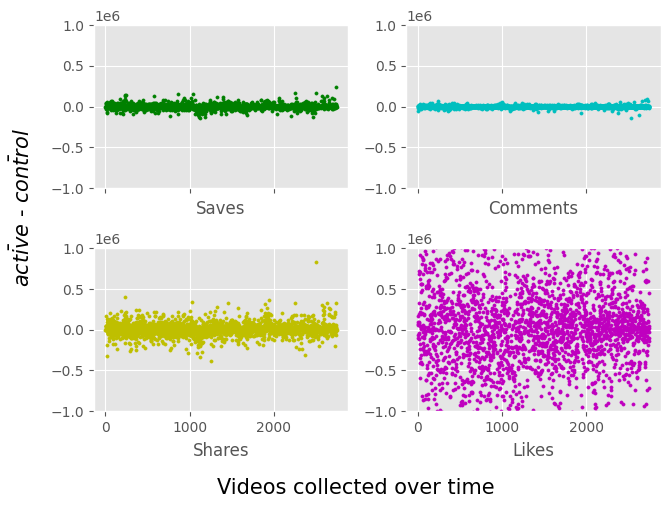

In [52]:
# Create dataframes to store values of control subtracted from active for each interaction type
saves_dif = (saves_active-saves_control).reset_index(drop=True)
comments_dif = (comments_active-comments_control).reset_index(drop=True)
shares_dif = (shares_active-shares_control).reset_index(drop=True)
likes_dif = (likes_active-likes_control).reset_index(drop=True)

# Create plot figure of 2x2 subplots for difference of active-control
fdif = plt.figure()
fdif, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = False)

# Plot saves in top left, with x being the index and y being difference in avg saves
x_saves = saves_dif.index
y_saves = saves_dif
coefficients_saves = np.polyfit(x_saves, y_saves, 1)
axes[0][0].scatter(saves_dif.index, saves_dif, color = "g",s=5)
axes[0][0].plot(x_saves, np.polyval(coefficients_saves, x_saves), color='black', label='Regression Line')
axes[0][0].set_ylim(-1e6,1e6)
axes[0][0].set_xlabel('Saves', labelpad = 5)

# Plot comments in top right, with x being the index and y being difference in avg comments
x_comments = comments_dif.index
y_comments = comments_dif
coefficients_comments = np.polyfit(x_comments, y_comments, 1)
axes[0][1].scatter(x_comments, y_comments, color = "c",s=5)
axes[0][1].plot(x_comments, np.polyval(coefficients_comments, x_comments), color='black', label='Regression Line')
axes[0][1].set_ylim(-1e6,1e6)
axes[0][1].set_xlabel('Comments', labelpad = 5)

# Plot shares in bottom left, with x being the index and y being difference in avg shares
x_shares = shares_dif.index
y_shares = shares_dif
coefficients_shares = np.polyfit(x_shares, y_shares, 1)
axes[1][0].scatter(x_shares, y_shares, color = "y",s=5)
axes[1][0].plot(x_shares, np.polyval(coefficients_shares, x_shares), color='black', label='Regression Line')
axes[1][0].set_ylim(-1e6,1e6)
axes[1][0].set_xlabel('Shares', labelpad = 5)

# Plot likes in bottom right, with x being the index and y being difference in avg likes
x_likes = likes_dif.index
y_likes = likes_dif
coefficients_likes = np.polyfit(x_likes, y_likes, 1)
axes[1][1].scatter(x_likes, y_likes, color = "m",s=5)
axes[1][1].plot(x_likes, np.polyval(coefficients_likes, x_likes), color='black', label='Regression Line')
axes[1][1].set_ylim(-1e6,1e6)
axes[1][1].set_xlabel('Likes', labelpad = 5)

# Adding labels
fdif.tight_layout()
fdif.text(0.5, -0.04, 'Videos collected over time', ha='center',
              size=15)
fdif.text(-0.04, 0.4, r'$\bar{active}$ - $\bar{control}$', size=15).set_rotation(90)

plt.show()